In [1]:
import os
import pandas as pd
import numpy as np
import sys
import warnings
warnings.filterwarnings(action='ignore')

sys.path.append('./utility')
sys.path.append('./qsar')

from Featurizer import Featurize
from Data_pipeline import QSAR_pipeline

reading NP model ...
model in


In [3]:
%pwd

'/home/labhhc/Documents/Workspace/Publication/Y2023/Paper/HIV_IN_Classification/raw_data_features/Data_posthoc'

# 1. Molecular descriptors and fingerprints calculation

In [2]:
df = pd.read_csv("Data/CHEMBL3471_pchem.csv").drop(['Unnamed: 0'], axis =1)
df.head(2)

,Molecule ChEMBL ID,Smiles,Standard Type,Standard Relation,Standard Value,Standard Units,pChEMBL Value,Data Validity Comment,Assay Type,Assay Description,Assay Organism,Assay Variant Mutation,Target Name,Target Organism,Document Journal,pChEMBL,Canonical_Smiles
0,CHEMBL414850,O=C(NCc1ccc(F)cc1)c1nc(N2CCCCS2(=O)=O)c2cccnc2c1O,IC50,'=',0.5,nM,9.30,NaN,B,In vitro concentration required to inhibit the...,Human immunodeficiency virus 1,NaN,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,J Med Chem,9.301030,O=C(NCc1ccc(F)cc1)c1nc(N2CCCCS2(=O)=O)c2cccnc2c1O
1,CHEMBL3805182,NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...,IC50,'=',0.6,nM,9.22,NaN,B,Inhibition of pseudotype HIV1 integrase strand...,Human immunodeficiency virus 1,NaN,Human immunodeficiency virus type 1 integrase,Human immunodeficiency virus 1,Eur J Med Chem,9.221849,NC(=O)c1c2c(c(O)c3ncc(Cc4cccc(Cl)c4F)cc13)C(=O...


In [ ]:
path = os.getcwd()

folder = 'raw_data_features'
isExist = os.path.exists(folder)
if not isExist:
    os.makedirs(folder)
save_dir = path+'/'+folder+"/"
fp = Featurize(data=df, smile_col='Smiles', activity_col='pChEMBL Value', m2v_path =f'{path}/utility/model_300dim.pkl',
            ID='Molecule ChEMBL ID', save_dir=save_dir, standardize = True, ro5 = 3)
fp.Apply()
os.chdir(path)

STANDARDIZING MOLECULES...


  0%|          | 0/2834 [00:00<?, ?it/s]

  0%|          | 0/2494 [00:00<?, ?it/s]

# 2. QSAR pipeline

Data train: (1995, 1026)
Data test: (499, 1026)
***************************************************************************


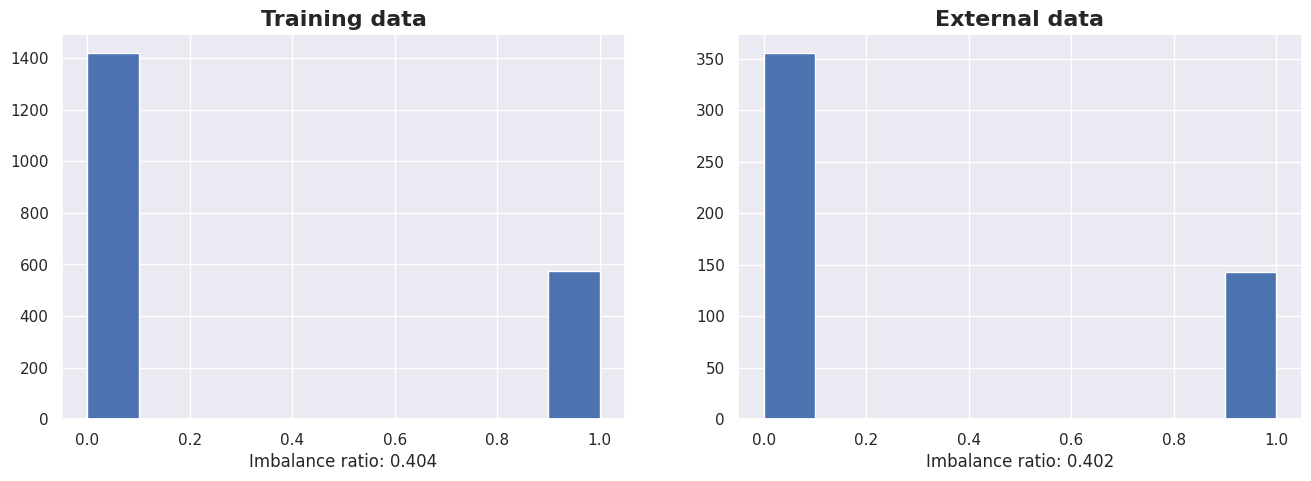

Total duplicated rows-train: 82
Data train before drop duplicates: 1995
Data train after drop duplicates: 1913
***************************************************************************
Total duplicated rows-test: 4
Data test before drop duplicates: 499
Data test after drop duplicates: 495
***************************************************************************
Index([], dtype='object')
Total similar columns: 0
Data train before drop duplicates: (1913, 1026)
Data after drop duplicates: (1913, 1026)
***************************************************************************
Data test before drop duplicates: (495, 1026)
Data test after drop duplicates: (495, 1026)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles            1913.0           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


Total row-test with missing value 0
(1913, 1024) (1913,)
>Threshold=0.00, Features=1023
>Threshold=0.05, Features=800
>Threshold=0.10, Features=614
>Threshold=0.15, Features=445
>Threshold=0.20, Features=289


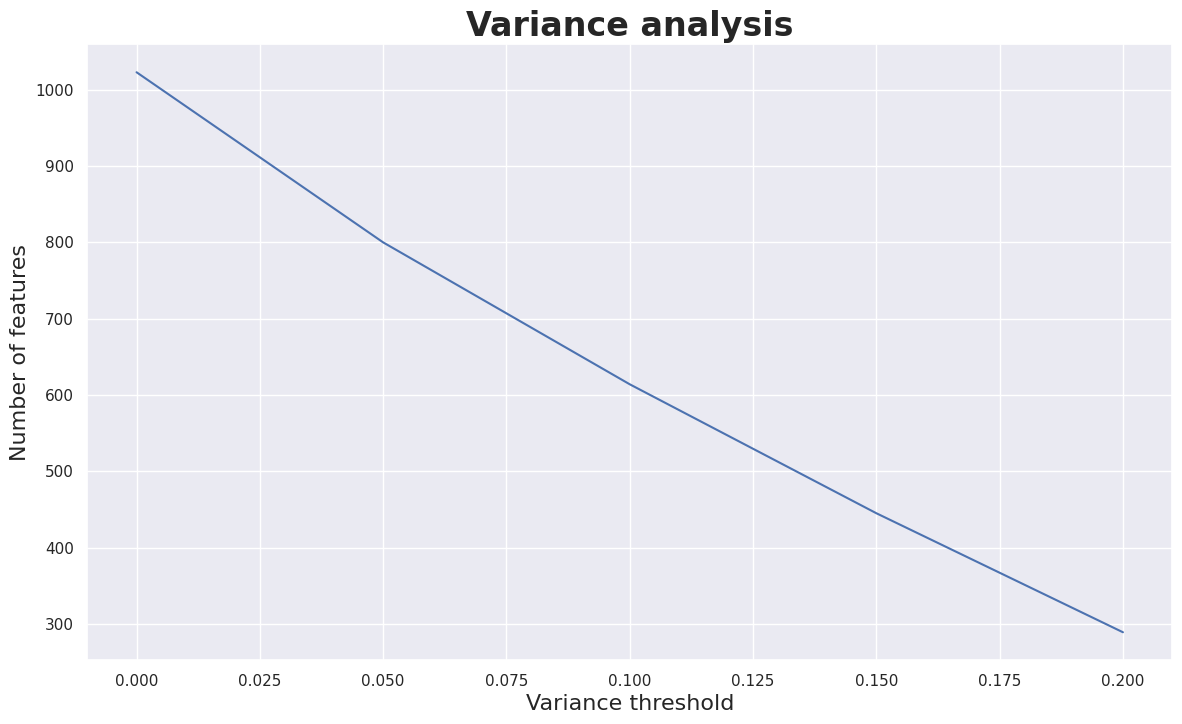

***************************************************************************


,pChEMBL Value,0,1,3,4,5,6,8,9,11,...,1013,1014,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,0,0
1,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,1,0,0,0,1,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 118
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.772 ± 0.047 (0.778)
>KNN 0.762 ± 0.048 (0.764)
>SVM 0.801 ± 0.047 (0.802)
>RF 0.817 ± 0.041 (0.819)
>ExT 0.811 ± 0.039 (0.813)
>Ada 0.726 ± 0.049 (0.721)
>Grad 0.808 ± 0.046 (0.817)
>XGB 0.819 ± 0.039 (0.828)
>CatB 0.826 ± 0.043 (0.834)
>MLP 0.825 ± 0.041 (0.825)
Data train: (1995, 212)
Data test: (499, 212)
***************************************************************************


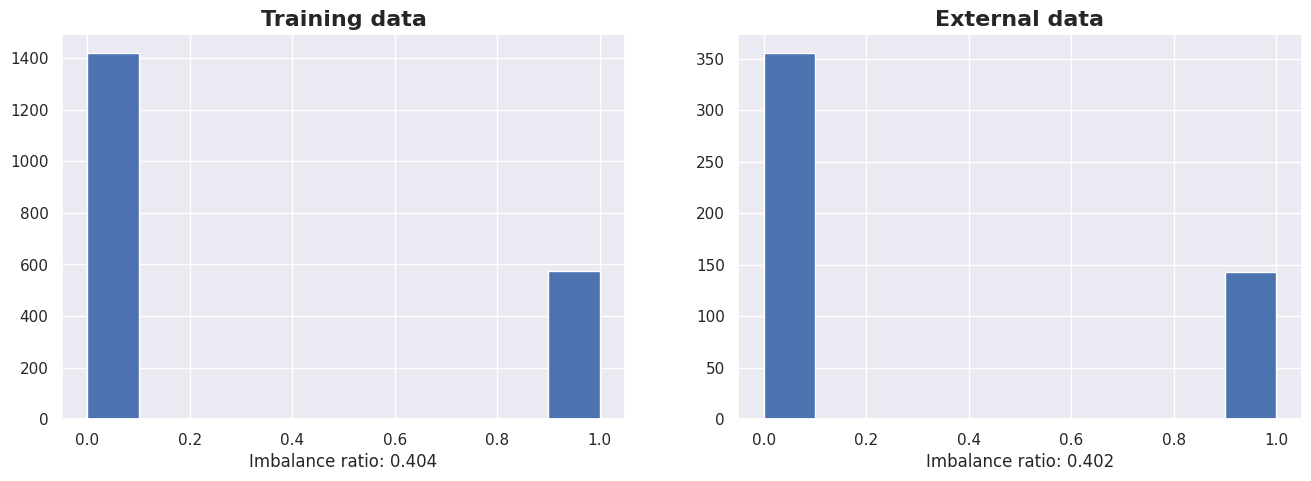

Total duplicated rows-train: 479
Data train before drop duplicates: 1995
Data train after drop duplicates: 1516
***************************************************************************
Total duplicated rows-test: 40
Data test before drop duplicates: 499
Data test after drop duplicates: 459
***************************************************************************
Index(['40', '41', '70', '91', '111', '112', '113', '115', '119', '120', '123',
       '124', '130', '131', '151', '160', '170', '190'],
      dtype='object')
Total similar columns: 18
Data train before drop duplicates: (1516, 212)
Data after drop duplicates: (1516, 194)
***************************************************************************
Data test before drop duplicates: (459, 212)
Data test after drop duplicates: (459, 194)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles            1516.0           100.0
Drop_cols [

,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,200,201,202,203,204,205,206,207,208,209


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,200,201,202,203,204,205,206,207,208,209


Total row-test with missing value 0
(1516, 192) (1516,)
>Threshold=0.00, Features=191
>Threshold=0.05, Features=173
>Threshold=0.10, Features=157
>Threshold=0.15, Features=148
>Threshold=0.20, Features=142
>Threshold=0.25, Features=138
>Threshold=0.30, Features=137
>Threshold=0.35, Features=133
>Threshold=0.40, Features=131
>Threshold=0.45, Features=128
>Threshold=0.50, Features=126
>Threshold=0.55, Features=125
>Threshold=0.60, Features=123
>Threshold=0.65, Features=119
>Threshold=0.70, Features=118
>Threshold=0.75, Features=116
>Threshold=0.80, Features=112
>Threshold=0.85, Features=112
>Threshold=0.90, Features=109
>Threshold=0.95, Features=107


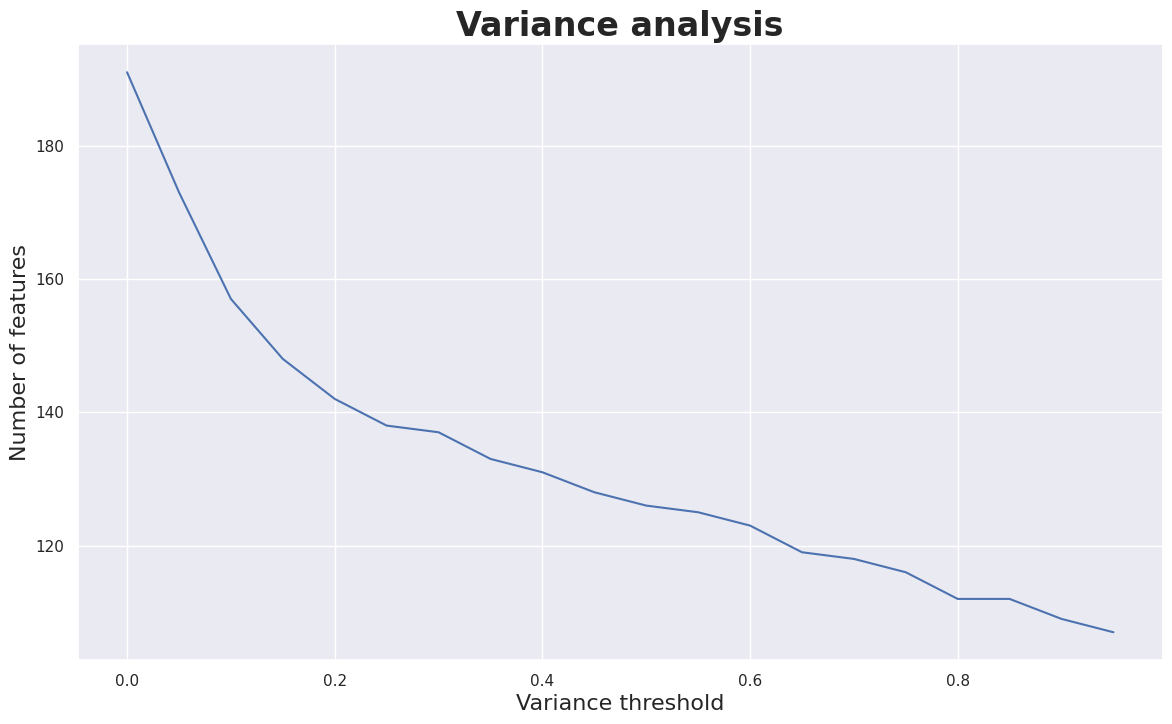

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,200,201,202,203,204,205,206,207,208,209
0,0,3,0,2,2,0,2.0,0.0,0,0,...,11.0,22.0,22.0,6.0,0.0,0.0,0.0,2.0,8.0,16.0
1,0,1,0,0,0,0,0.0,0.0,0,0,...,11.0,22.0,22.0,6.0,0.0,0.0,2.0,8.0,16.0,18.0
2,0,5,0,0,4,0,0.0,0.0,2,2,...,12.0,24.0,24.0,12.0,0.0,0.0,0.0,2.0,8.0,16.0
3,0,3,0,0,0,2,0.0,0.0,0,0,...,16.0,36.0,48.0,46.0,34.0,28.0,22.0,16.0,8.0,2.0
4,1,2,0,0,0,2,0.0,0.0,0,0,...,12.0,24.0,24.0,12.0,2.0,8.0,16.0,20.0,16.0,8.0


Remove by IQR without handling
Total data remove on Train 1483
Total data remove on Test 450
Number of good features: 1
Number of bad features with data remove > 0: 107
***************************************************************************
Uniform Transformer technique
Total data remove on Train 1420
Total data remove on Test 422
Number of good features: 64
Number of bad features with data remove > 0: 44
***************************************************************************
Handling with KBin method
////// ['5', '6', '34', '39', '43', '46', '47', '48', '71', '73', '74', '75', '78', '79', '83', '84', '85', '86', '87', '89', '93', '94', '97', '98', '99', '128', '129', '142', '143', '144', '145', '146', '147', '172', '173', '181', '182', '183', '184', '185', '186', '187', '188', '189'] 44
Total data remove on Train 0
Total data remove on Test 1
Number of good features: 64
Number of bad features with data remove > 0: 0
*************************************************************

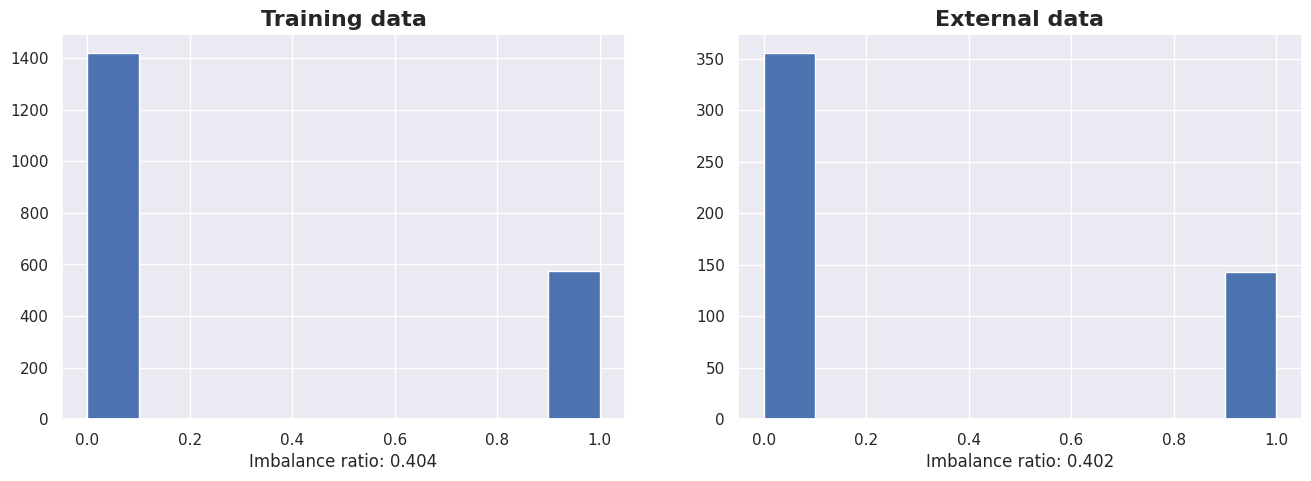

Total duplicated rows-train: 118
Data train before drop duplicates: 1995
Data train after drop duplicates: 1877
***************************************************************************
Total duplicated rows-test: 7
Data test before drop duplicates: 499
Data test after drop duplicates: 492
***************************************************************************
Index(['2', '6', '7', '10', '15', '16', '17', '19', '20', '21',
       ...
       '2031', '2032', '2036', '2037', '2040', '2041', '2043', '2045', '2046',
       '2047'],
      dtype='object', length=1275)
Total similar columns: 1275
Data train before drop duplicates: (1877, 2050)
Data after drop duplicates: (1877, 775)
***************************************************************************
Data test before drop duplicates: (492, 2050)
Data test after drop duplicates: (492, 775)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmi

,pChEMBL Value,0,1,3,4,5,8,9,11,12,...,2022,2027,2028,2033,2034,2035,2038,2039,2042,2044


Total row-train with missing value 0


,pChEMBL Value,0,1,3,4,5,8,9,11,12,...,2022,2027,2028,2033,2034,2035,2038,2039,2042,2044


Total row-test with missing value 0
(1877, 773) (1877,)
>Threshold=0.00, Features=772
>Threshold=0.05, Features=98
>Threshold=0.10, Features=54
>Threshold=0.15, Features=30
>Threshold=0.20, Features=15


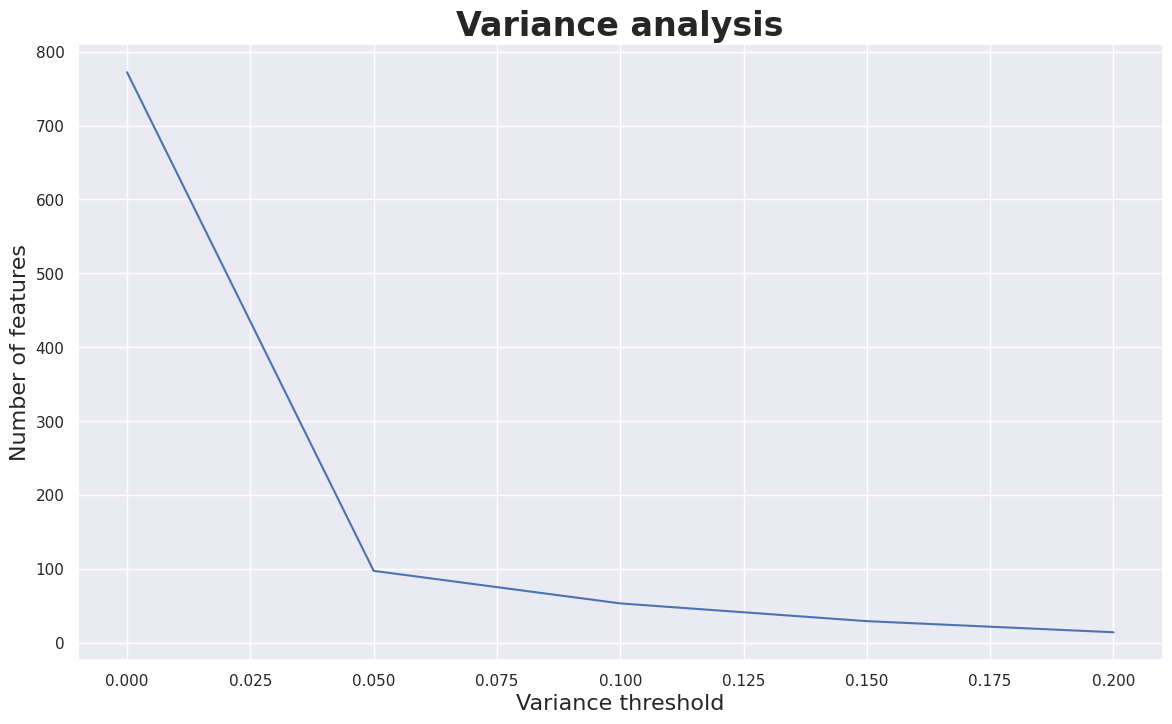

***************************************************************************


,pChEMBL Value,1,31,45,80,114,119,147,191,197,...,1840,1855,1866,1917,1922,1928,1970,1984,1991,2033
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,1,0,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 0
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.745 ± 0.050 (0.739)
>KNN 0.750 ± 0.045 (0.760)
>SVM 0.779 ± 0.043 (0.783)
>RF 0.767 ± 0.047 (0.769)
>ExT 0.767 ± 0.047 (0.765)
>Ada 0.746 ± 0.055 (0.748)
>Grad 0.773 ± 0.046 (0.770)
>XGB 0.774 ± 0.046 (0.778)
>CatB 0.783 ± 0.049 (0.784)
>MLP 0.775 ± 0.048 (0.774)
Data train: (1995, 2050)
Data test: (499, 2050)
***************************************************************************


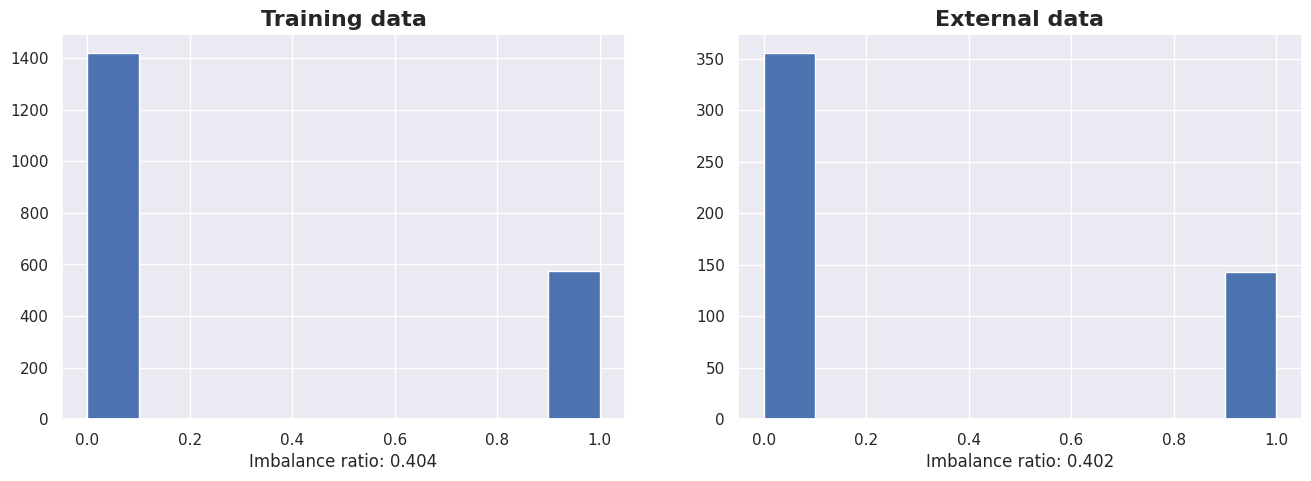

Total duplicated rows-train: 63
Data train before drop duplicates: 1995
Data train after drop duplicates: 1932
***************************************************************************
Total duplicated rows-test: 3
Data test before drop duplicates: 499
Data test after drop duplicates: 496
***************************************************************************
Index(['17', '24', '44', '51', '72', '113', '132', '153', '181', '182', '189',
       '224', '226', '278', '365', '393', '395', '398', '415', '417', '444',
       '447', '450', '508', '527', '551', '568', '607', '617', '644', '646',
       '706', '709', '775', '808', '822', '830', '856', '874', '877', '905',
       '912', '920', '939', '943', '968', '988', '1000', '1003', '1023',
       '1051', '1053', '1064', '1081', '1107', '1124', '1161', '1173', '1180',
       '1198', '1216', '1304', '1319', '1320', '1330', '1335', '1337', '1343',
       '1352', '1389', '1427', '1437', '1450', '1541', '1551', '1566', '1576',
       '1596

,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-test with missing value 0
(1932, 1951) (1932,)
>Threshold=0.00, Features=1950
>Threshold=0.05, Features=150
>Threshold=0.10, Features=71
>Threshold=0.15, Features=39
>Threshold=0.20, Features=22


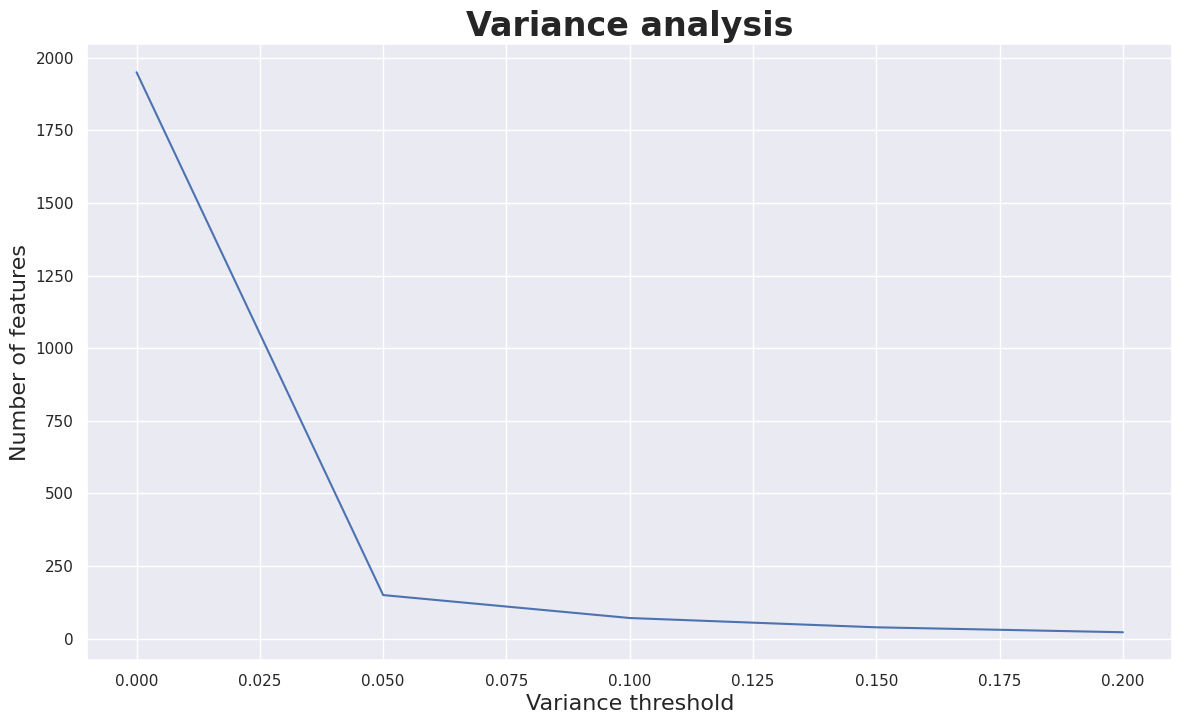

***************************************************************************


,pChEMBL Value,1,31,45,61,80,90,114,119,147,...,1855,1866,1917,1922,1928,1939,1970,1984,1991,2033
0,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,1,0,0,0,...,1,0,1,0,1,0,0,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 0
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.733 ± 0.039 (0.743)
>KNN 0.754 ± 0.035 (0.754)
>SVM 0.786 ± 0.036 (0.786)
>RF 0.793 ± 0.036 (0.789)
>ExT 0.789 ± 0.032 (0.789)
>Ada 0.721 ± 0.038 (0.717)
>Grad 0.787 ± 0.034 (0.786)
>XGB 0.796 ± 0.036 (0.793)
>CatB 0.795 ± 0.032 (0.794)
>MLP 0.773 ± 0.038 (0.773)
Data train: (1995, 4098)
Data test: (499, 4098)
***************************************************************************


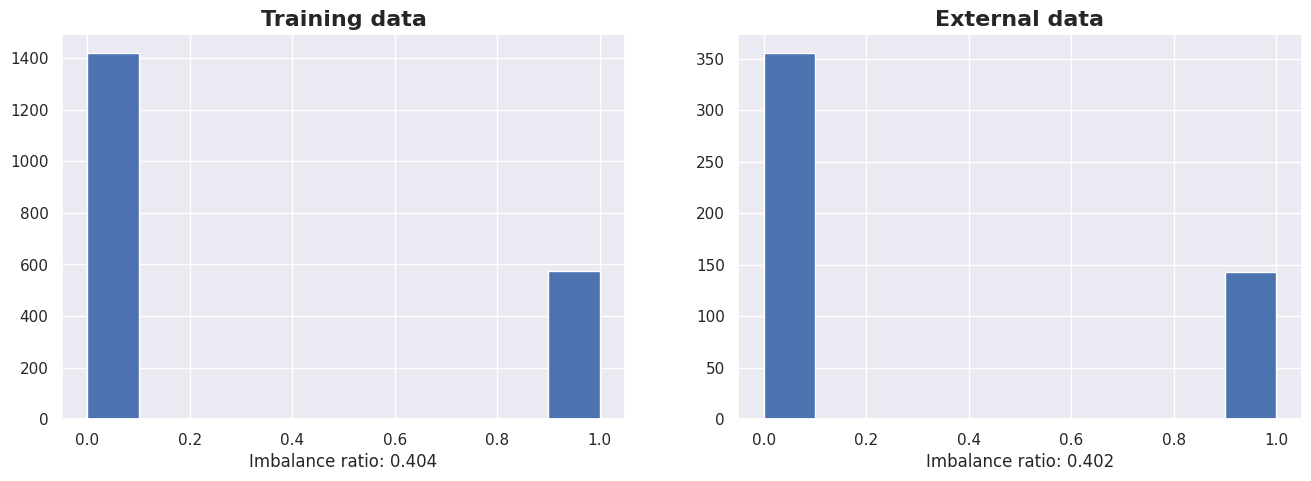

Total duplicated rows-train: 60
Data train before drop duplicates: 1995
Data train after drop duplicates: 1935
***************************************************************************
Total duplicated rows-test: 3
Data test before drop duplicates: 499
Data test after drop duplicates: 496
***************************************************************************
Index(['164', '215', '272', '312', '337', '376', '395', '444', '454', '461',
       ...
       '3634', '3635', '3641', '3644', '3726', '3884', '3896', '3950', '3973',
       '3993'],
      dtype='object', length=101)
Total similar columns: 101
Data train before drop duplicates: (1935, 4098)
Data after drop duplicates: (1935, 3997)
***************************************************************************
Data test before drop duplicates: (496, 4098)
Data test after drop duplicates: (496, 3997)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  

,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-test with missing value 0
(1935, 3995) (1935,)
>Threshold=0.00, Features=3994
>Threshold=0.05, Features=169
>Threshold=0.10, Features=82
>Threshold=0.15, Features=44
>Threshold=0.20, Features=21


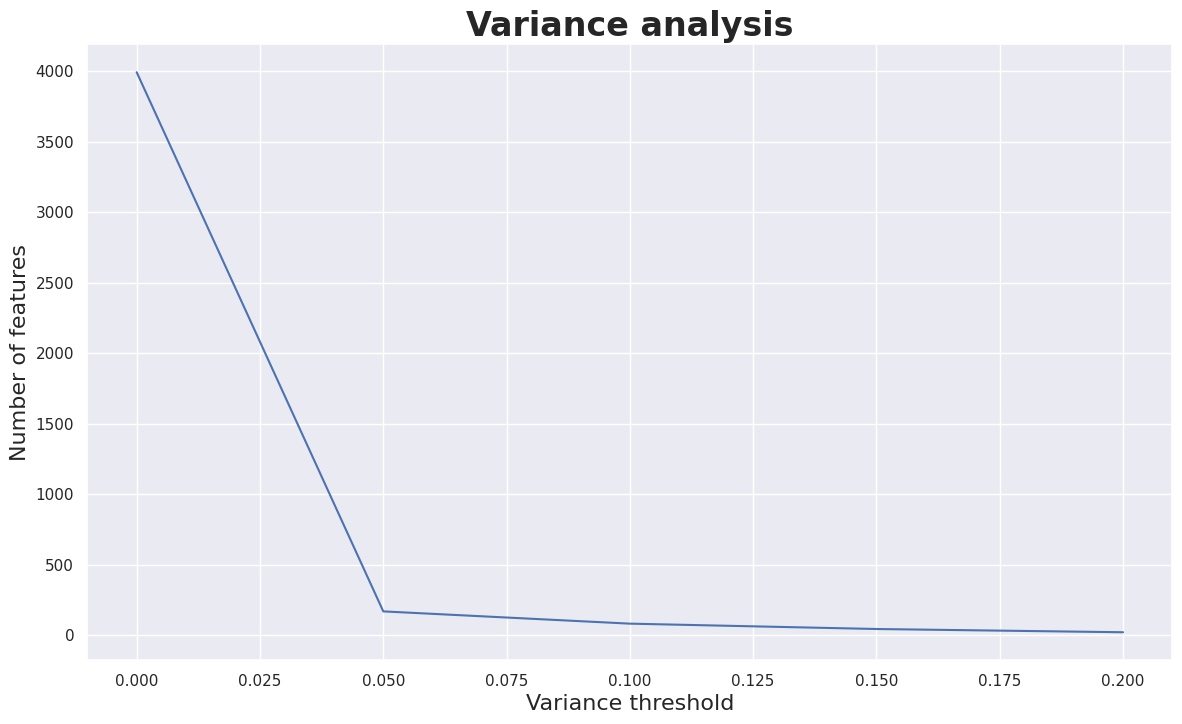

***************************************************************************


,pChEMBL Value,31,32,45,90,97,119,147,191,197,...,3793,3802,3864,3888,3903,3914,3986,3987,4032,4039
0,0,1,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 6
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.747 ± 0.042 (0.754)
>KNN 0.748 ± 0.039 (0.744)
>SVM 0.794 ± 0.038 (0.800)
>RF 0.792 ± 0.036 (0.788)
>ExT 0.791 ± 0.040 (0.791)
>Ada 0.723 ± 0.042 (0.724)
>Grad 0.791 ± 0.040 (0.792)
>XGB 0.806 ± 0.034 (0.804)
>CatB 0.808 ± 0.038 (0.809)
>MLP 0.801 ± 0.033 (0.798)
Data train: (1995, 169)
Data test: (499, 169)
***************************************************************************


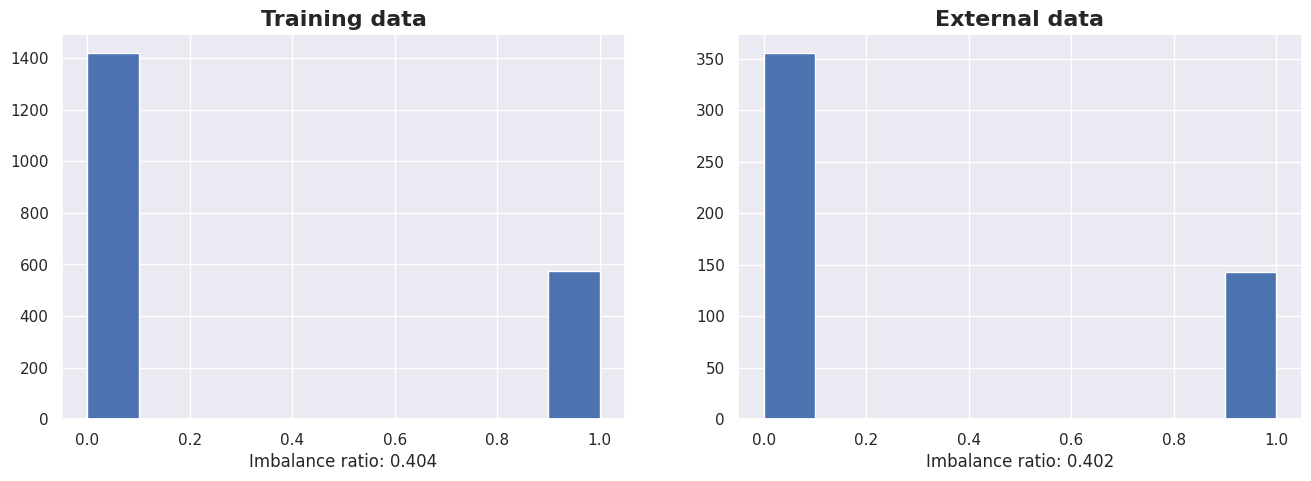

Total duplicated rows-train: 376
Data train before drop duplicates: 1995
Data train after drop duplicates: 1619
***************************************************************************
Total duplicated rows-test: 31
Data test before drop duplicates: 499
Data test after drop duplicates: 468
***************************************************************************
Index(['1', '2', '3', '4', '5', '6', '7', '9', '10', '12', '14', '15', '21',
       '31', '35', '44', '58', '60', '63', '67', '134', '143', '166'],
      dtype='object')
Total similar columns: 23
Data train before drop duplicates: (1619, 169)
Data after drop duplicates: (1619, 146)
***************************************************************************
Data test before drop duplicates: (468, 169)
Data test after drop duplicates: (468, 146)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles            1619.0           100.0


,pChEMBL Value,0,8,11,13,16,17,18,19,20,...,156,157,158,159,160,161,162,163,164,165


Total row-train with missing value 0


,pChEMBL Value,0,8,11,13,16,17,18,19,20,...,156,157,158,159,160,161,162,163,164,165


Total row-test with missing value 0
(1619, 144) (1619,)
>Threshold=0.00, Features=143
>Threshold=0.05, Features=108
>Threshold=0.10, Features=89
>Threshold=0.15, Features=66
>Threshold=0.20, Features=42


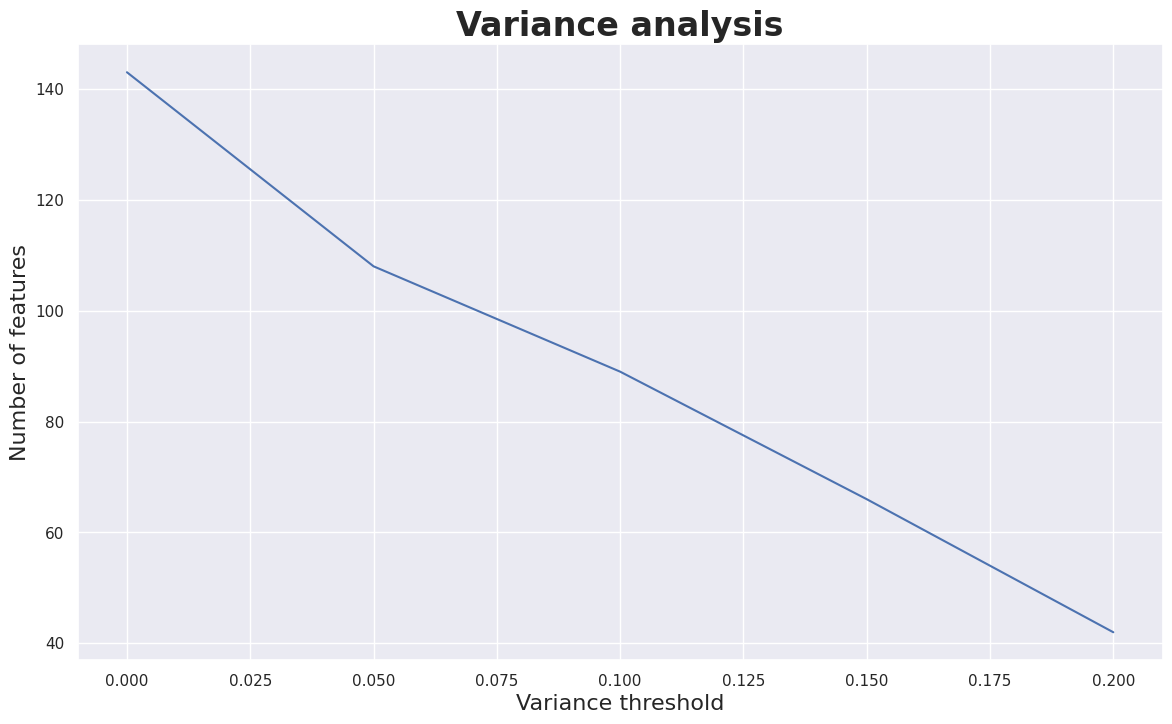

***************************************************************************


,pChEMBL Value,13,24,32,33,36,37,38,42,43,...,151,152,153,154,155,156,157,158,160,161
0,0,0,0,0,0,0,0,0,0,1,...,1,1,0,1,0,1,1,1,0,1
1,0,0,0,0,0,1,0,0,0,0,...,1,1,0,1,1,1,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,0,1,1,0,...,1,1,1,1,1,1,1,1,1,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 3
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.709 ± 0.048 (0.700)
>KNN 0.730 ± 0.044 (0.733)
>SVM 0.759 ± 0.036 (0.753)
>RF 0.768 ± 0.050 (0.771)
>ExT 0.771 ± 0.047 (0.773)
>Ada 0.695 ± 0.049 (0.708)
>Grad 0.751 ± 0.044 (0.743)
>XGB 0.758 ± 0.050 (0.761)
>CatB 0.772 ± 0.039 (0.773)
>MLP 0.745 ± 0.047 (0.749)
Data train: (1995, 1026)
Data test: (499, 1026)
***************************************************************************


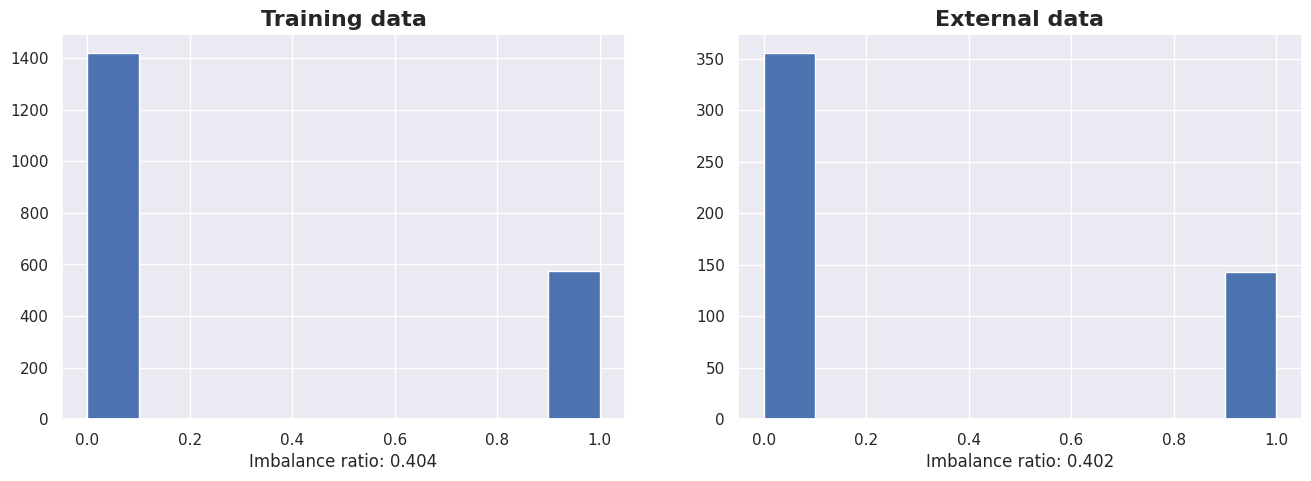

Total duplicated rows-train: 40
Data train before drop duplicates: 1995
Data train after drop duplicates: 1955
***************************************************************************
Total duplicated rows-test: 2
Data test before drop duplicates: 499
Data test after drop duplicates: 497
***************************************************************************
Index([], dtype='object')
Total similar columns: 0
Data train before drop duplicates: (1955, 1026)
Data after drop duplicates: (1955, 1026)
***************************************************************************
Data test before drop duplicates: (497, 1026)
Data test after drop duplicates: (497, 1026)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles            1955.0           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023


Total row-test with missing value 0
(1955, 1024) (1955,)
>Threshold=0.00, Features=1024
>Threshold=0.05, Features=1021
>Threshold=0.10, Features=1019
>Threshold=0.15, Features=1017
>Threshold=0.20, Features=956


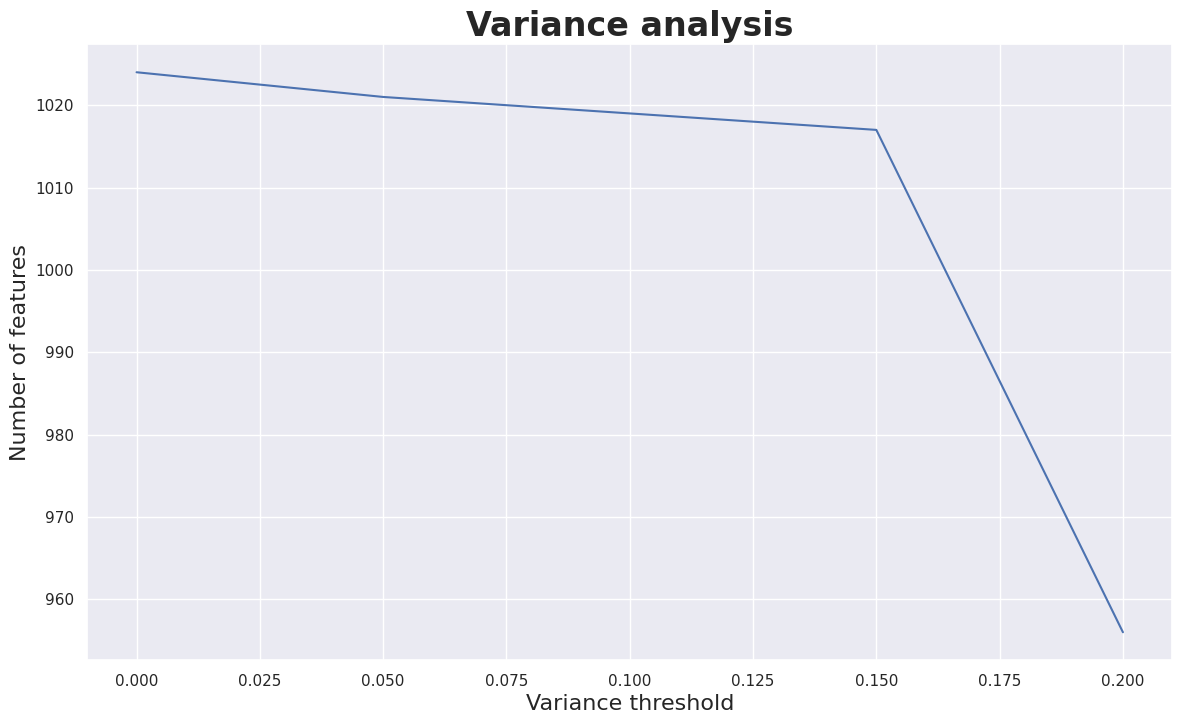

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,1,0,0,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,1,0,1,0,0,1,1,0,1
2,0,0,1,0,0,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,1,0,0,0,0,0
4,1,1,0,0,0,1,1,0,1,0,...,1,1,1,1,1,0,0,0,0,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 0
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.759 ± 0.038 (0.773)
>KNN 0.744 ± 0.047 (0.750)
>SVM 0.790 ± 0.033 (0.798)
>RF 0.769 ± 0.041 (0.769)
>ExT 0.784 ± 0.042 (0.784)
>Ada 0.733 ± 0.044 (0.739)
>Grad 0.781 ± 0.040 (0.785)
>XGB 0.790 ± 0.038 (0.789)
>CatB 0.790 ± 0.035 (0.794)
>MLP 0.793 ± 0.034 (0.796)
Data train: (1995, 301)
Data test: (499, 301)
***************************************************************************


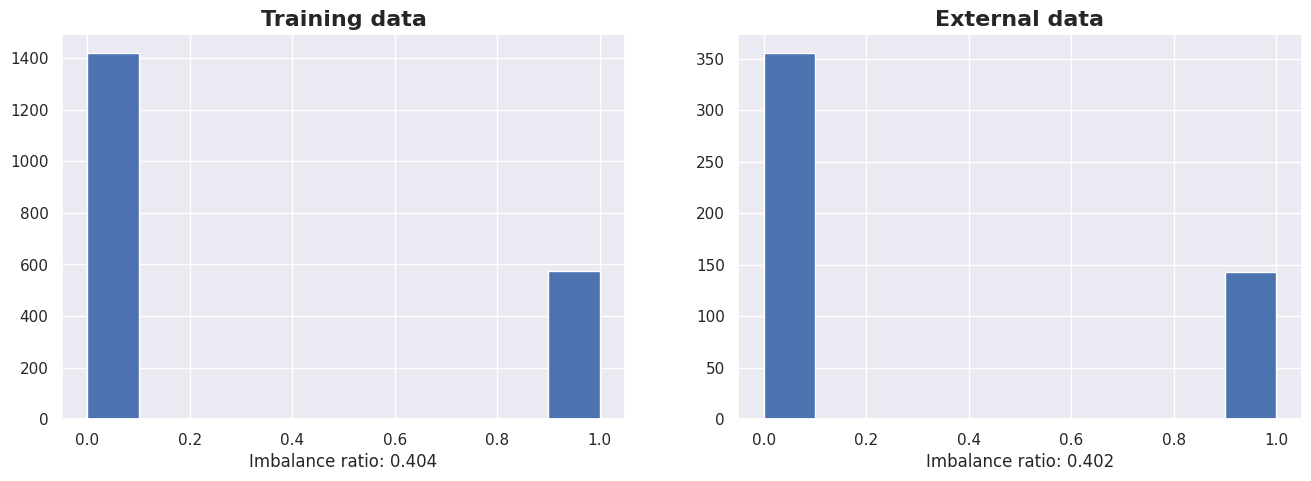

Total duplicated rows-train: 53
Data train before drop duplicates: 1995
Data train after drop duplicates: 1942
***************************************************************************
Total duplicated rows-test: 3
Data test before drop duplicates: 499
Data test after drop duplicates: 496
***************************************************************************
Index([], dtype='object')
Total similar columns: 0
Data train before drop duplicates: (1942, 301)
Data after drop duplicates: (1942, 301)
***************************************************************************
Data test before drop duplicates: (496, 301)
Data test after drop duplicates: (496, 301)
***************************************************************************
Empty DataFrame
Columns: [ColumnName, TotalMissingVals, PercentMissing]
Index: []
Drop_cols []
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299


Total row-test with missing value 0
(1942, 300) (1942,)
>Threshold=0.00, Features=300
>Threshold=0.05, Features=300
>Threshold=0.10, Features=300
>Threshold=0.15, Features=300
>Threshold=0.20, Features=300
>Threshold=0.25, Features=300
>Threshold=0.30, Features=300
>Threshold=0.35, Features=300
>Threshold=0.40, Features=300
>Threshold=0.45, Features=300
>Threshold=0.50, Features=300
>Threshold=0.55, Features=300
>Threshold=0.60, Features=300
>Threshold=0.65, Features=300
>Threshold=0.70, Features=300
>Threshold=0.75, Features=300
>Threshold=0.80, Features=300
>Threshold=0.85, Features=300
>Threshold=0.90, Features=300
>Threshold=0.95, Features=300


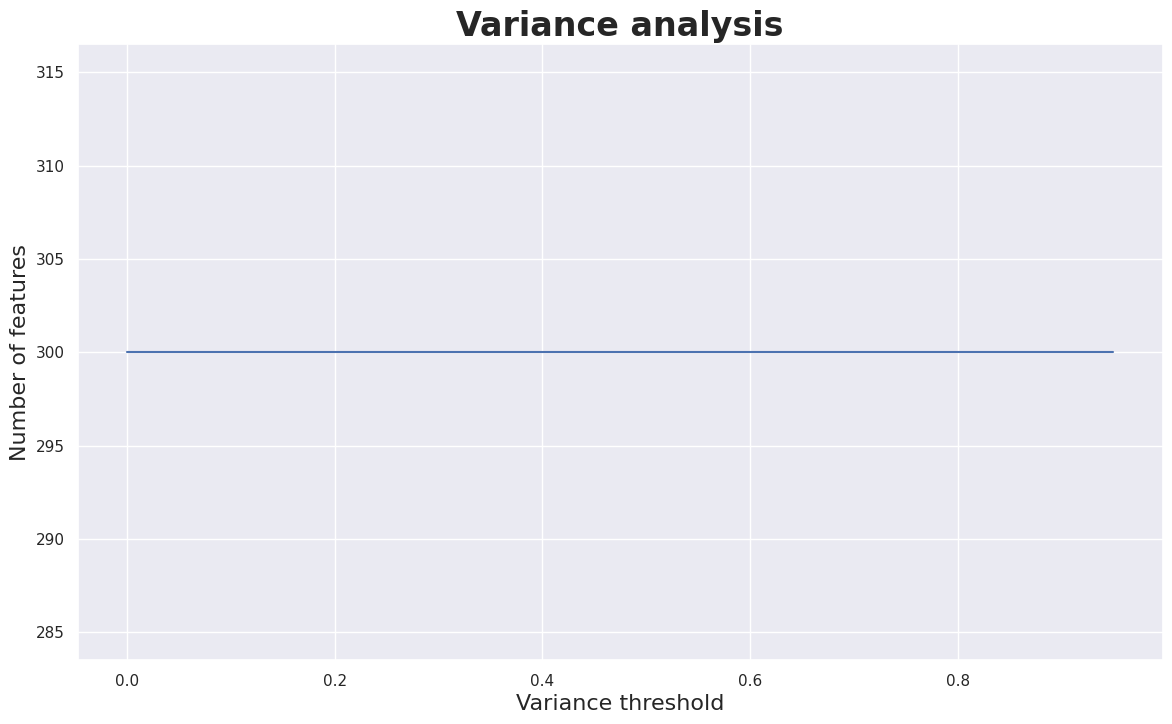

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,0,-0.299336,-0.916827,-2.283330,2.120062,-0.061506,-0.792667,-10.971027,-1.993182,8.285200,...,-2.308146,6.237433,9.241376,0.265832,-7.414297,-1.893086,-7.337691,-2.767107,-6.935103,-1.463239
1,0,-0.305669,-3.030424,-3.344596,3.640795,0.083330,0.369742,-8.970116,-1.050542,6.869361,...,-1.547121,8.763342,9.926341,1.531589,-5.219890,-2.790203,-4.094796,-3.495124,-9.110988,-1.064911
2,0,-0.041808,0.994544,-5.649590,3.043636,1.216202,1.717292,-13.489558,0.009985,5.663669,...,-5.257385,8.468224,10.835604,3.101262,-10.176989,-4.346489,-7.297614,-5.083274,-10.426134,0.484287
3,0,1.982045,0.260539,-3.276771,4.500892,-0.125869,2.021122,-9.582188,0.263892,3.422953,...,-2.291773,9.997488,8.845304,0.293419,-6.472308,-2.079509,-7.360910,-0.766511,-9.342698,1.211581
4,1,3.926340,-4.416006,-2.907813,6.632743,-1.883642,-1.206894,-11.451368,-1.740922,6.970557,...,-0.957456,11.470165,8.322384,-3.554981,-9.692085,-3.598547,-5.328354,-5.098169,-15.379910,-1.759405


Remove by IQR without handling
Total data remove on Train 1860
Total data remove on Test 477
Number of good features: 0
Number of bad features with data remove > 0: 300
***************************************************************************
Uniform Transformer technique
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 300
Number of bad features with data remove > 0: 0
***************************************************************************
Handling with KBin method
////// [] 0
Total outlier remove by LOF: 43
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.731 ± 0.051 (0.732)
>KNN 0.737 ± 0.040 (0.738)
>SVM 0.792 ± 0.042 (0.787)
>RF 0.772 ± 0.043 (0.765)
>ExT 0.790 ± 0.038 (0.788)
>Ada 0.737 ± 0.053 (0.742)
>Grad 0.763 ± 0.044 (0.759)
>XGB 0.787 ± 0.043 (0.777)
>CatB 0.791 ± 0.045 (0.785)
>MLP 0.801 ± 0.038 (0.800)
Data train: (1995, 1614)
Data test: (499, 1614)
*****************

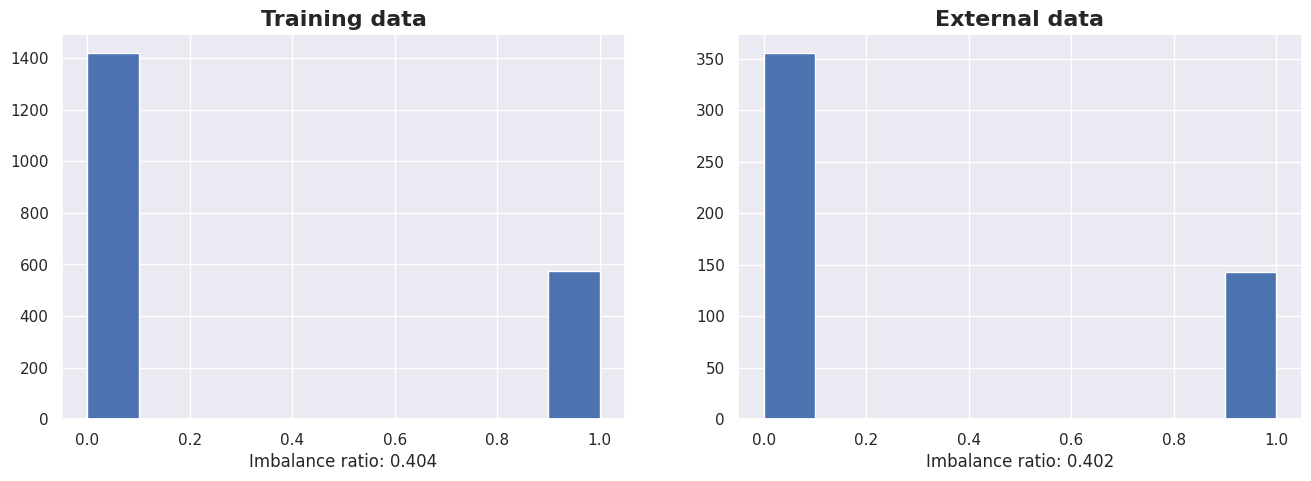

Total duplicated rows-train: 43
Data train before drop duplicates: 1995
Data train after drop duplicates: 1952
***************************************************************************
Total duplicated rows-test: 3
Data test before drop duplicates: 499
Data test after drop duplicates: 496
***************************************************************************
Index(['nBondsA', 'NsLi', 'NssBe', 'NssssBe', 'NssBH', 'NsssB', 'NssssB',
       'NtCH', 'NddC', 'NsNH3',
       ...
       'n8FARing', 'n11FARing', 'n4FAHRing', 'n5FAHRing', 'n6FAHRing',
       'n7FAHRing', 'n8FAHRing', 'n11FAHRing', 'n12FAHRing', 'MWC01'],
      dtype='object', length=344)
Total similar columns: 344
Data train before drop duplicates: (1952, 1614)
Data after drop duplicates: (1952, 1270)
***************************************************************************
Data test before drop duplicates: (496, 1614)
Data test after drop duplicates: (496, 1270)
********************************************************

,pChEMBL Value,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
3,0,15.791708,12.650561,0.0,0.0,25.451877,2.474127,4.948254,25.451877,1.272594,...,10.069637,54.100551,270.052823,9.001761,781.0,34.0,108.0,129.0,6.888889,4.305556
5,0,19.315311,16.046002,1.0,0.0,31.692628,2.532576,5.065152,31.692628,1.267705,...,10.304777,60.151501,355.051444,9.343459,1400.0,45.0,132.0,159.0,9.361111,5.555556
6,0,16.377494,13.812054,0.0,0.0,27.611454,2.506928,5.013855,27.611454,1.314831,...,10.151402,55.366354,288.111007,7.786784,836.0,38.0,112.0,136.0,7.138889,4.638889
8,0,21.187953,17.184429,0.0,0.0,33.335086,2.452850,4.880808,33.335086,1.234633,...,10.249875,76.249138,423.059044,9.401312,1988.0,42.0,144.0,168.0,10.562500,5.708333
11,0,16.429865,13.363872,1.0,0.0,27.157713,2.436451,4.872235,27.157713,1.293224,...,9.937261,68.003286,281.068808,8.783400,981.0,31.0,110.0,129.0,6.527778,4.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1935,0,27.950422,20.959932,0.0,1.0,45.993217,2.499649,4.999299,45.993217,1.277589,...,10.510505,72.649210,493.201299,7.706270,4115.0,60.0,188.0,221.0,12.444444,7.944444
1941,0,17.844078,14.825505,0.0,0.0,30.186106,2.415540,4.814325,30.186106,1.312439,...,9.932124,70.254415,328.063011,9.373229,1259.0,33.0,118.0,137.0,7.027778,5.111111
1942,0,20.371456,16.716665,0.0,0.0,32.216768,2.452548,4.880496,32.216768,1.239106,...,10.200513,75.024276,409.043394,9.739128,1765.0,40.0,138.0,161.0,9.701389,5.541667
1947,0,22.005839,18.070616,0.0,0.0,36.734039,2.528650,4.883441,36.734039,1.311930,...,10.266150,79.487394,379.105587,8.424569,1996.0,44.0,150.0,179.0,8.611111,6.166667


Total row-train with missing value 820


,pChEMBL Value,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1,0,17.205921,13.638959,1.0,0.0,28.473310,2.462651,4.925301,28.473310,1.294241,...,10.068112,56.322002,292.073559,8.590399,1065.0,36.0,116.0,137.0,7.388889,4.805556
4,0,14.268104,11.927348,0.0,0.0,23.747095,2.484120,4.849411,23.747095,1.319283,...,9.924809,65.524066,260.025563,10.000983,584.0,29.0,98.0,118.0,5.777778,3.888889
6,0,20.919712,18.344155,4.0,0.0,31.515024,2.543983,5.087966,31.515024,1.167223,...,10.474382,62.750162,491.901972,11.997609,1696.0,48.0,144.0,170.0,12.854167,5.597222
8,0,15.015651,11.697337,0.0,0.0,24.950410,2.433984,4.867968,24.950410,1.313179,...,9.953372,52.718151,252.078644,8.131569,712.0,31.0,102.0,121.0,6.027778,4.111111
12,0,19.477072,16.921094,0.0,0.0,32.091150,2.373380,4.703709,32.091150,1.234275,...,9.892174,73.798723,393.053463,9.140778,1933.0,36.0,126.0,143.0,9.888889,5.944444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,0,17.393199,14.160636,0.0,0.0,27.915790,2.502778,5.005557,27.915790,1.268900,...,10.220449,56.714110,350.979063,10.968096,1004.0,38.0,120.0,143.0,8.090278,4.652778
485,0,17.343821,14.593046,0.0,0.0,27.728213,2.497645,4.857246,27.728213,1.260373,...,10.165044,70.890879,325.031727,10.157241,1038.0,38.0,120.0,145.0,8.611111,4.694444
486,0,18.729525,14.444644,1.0,0.0,30.613436,2.436836,4.873672,30.613436,1.275560,...,10.125951,58.690037,325.095023,8.335770,1459.0,39.0,126.0,148.0,8.500000,5.222222
487,0,27.352705,20.728068,1.0,0.0,44.618358,2.486607,4.837537,44.618358,1.274810,...,10.438430,85.733855,477.097228,9.354848,4070.0,56.0,184.0,216.0,12.194444,7.611111


Total row-test with missing value 191


(1952, 1215)

(496, 1215)

***************************************************************************
(1952, 1214) (1952,)
>Threshold=0.00, Features=1213
>Threshold=0.05, Features=792
>Threshold=0.10, Features=712
>Threshold=0.15, Features=683
>Threshold=0.20, Features=664
>Threshold=0.25, Features=639
>Threshold=0.30, Features=615
>Threshold=0.35, Features=609
>Threshold=0.40, Features=601
>Threshold=0.45, Features=587
>Threshold=0.50, Features=581
>Threshold=0.55, Features=571
>Threshold=0.60, Features=568
>Threshold=0.65, Features=564
>Threshold=0.70, Features=559
>Threshold=0.75, Features=556
>Threshold=0.80, Features=554
>Threshold=0.85, Features=547
>Threshold=0.90, Features=544
>Threshold=0.95, Features=543


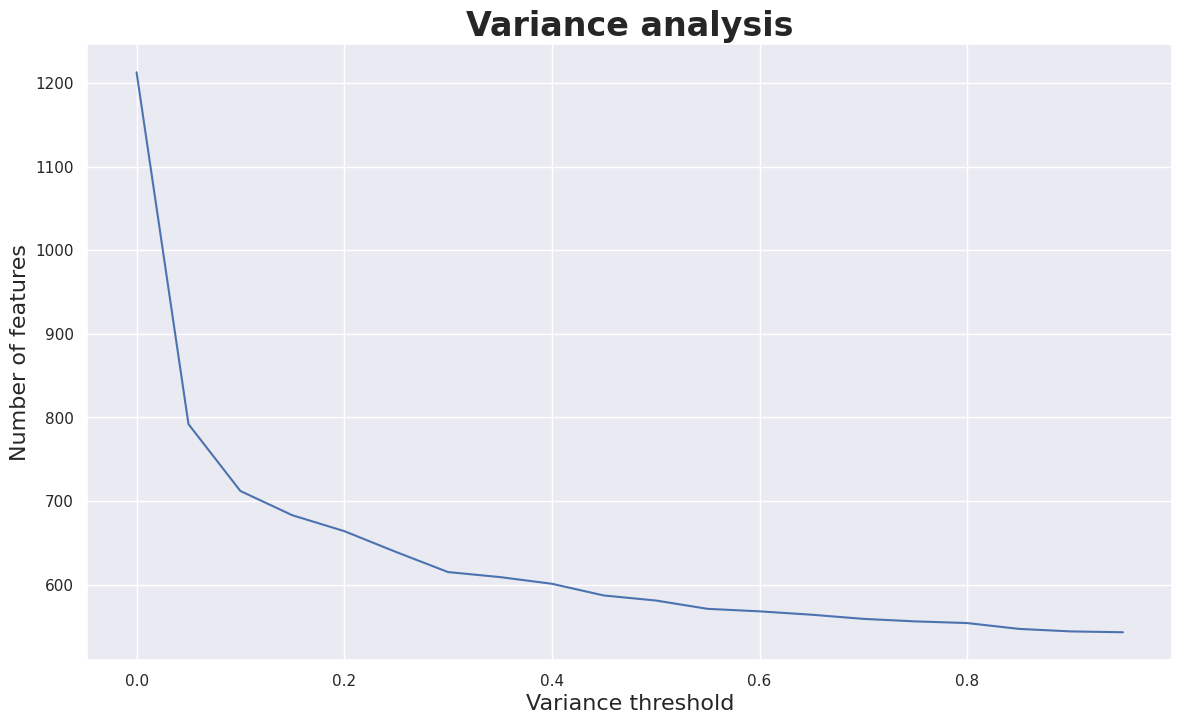

***************************************************************************


,pChEMBL Value,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpAD_A,VE1_A,VE3_A,VR1_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,15.136972,13.018519,0,0,25.271354,25.271354,3.902993,2.054891,139.104360,...,9.470626,65.721140,288.056863,9.001777,964.0,23.0,96.0,106.0,6.555556,4.527778
1,0,15.205921,13.292064,0,0,25.009377,25.009377,4.174726,2.122196,103.939019,...,9.574497,65.988332,308.002241,10.620767,918.0,25.0,98.0,110.0,7.166667,4.472222
2,0,19.736291,16.112725,1,0,32.041555,32.041555,4.568756,2.474752,167.357286,...,9.935228,60.389419,360.084517,8.573441,1931.0,37.0,128.0,144.0,10.500000,5.750000
3,0,15.791708,12.650561,0,0,25.451877,25.451877,3.968479,2.071530,131.282637,...,10.069637,54.100551,270.052823,9.001761,781.0,34.0,108.0,129.0,6.888889,4.305556
4,1,22.471908,18.105432,0,1,36.381156,36.381156,4.313363,2.526429,544.643116,...,10.350191,64.691419,403.165582,7.905207,2320.0,50.0,152.0,180.0,11.583333,6.305556


Remove by IQR without handling
Total data remove on Train 1949
Total data remove on Test 496
Number of good features: 8
Number of bad features with data remove > 0: 713
***************************************************************************
Uniform Transformer technique
Total data remove on Train 1549
Total data remove on Test 400
Number of good features: 699
Number of bad features with data remove > 0: 22
***************************************************************************
Handling with KBin method
////// ['SdCH2', 'SdsCH', 'SsssCH', 'StsC', 'SssssC', 'SsNH2', 'SaaNH', 'StN', 'SdsN', 'SaaO', 'SsSH', 'SdS', 'SssS', 'SaaS', 'SddssS', 'SsCl', 'SsBr', 'PEOE_VSA4', 'PEOE_VSA5', 'SMR_VSA2', 'SMR_VSA4', 'SlogP_VSA7'] 22
Total data remove on Train 0
Total data remove on Test 1
Number of good features: 699
Number of bad features with data remove > 0: 0
***************************************************************************
********************************************************

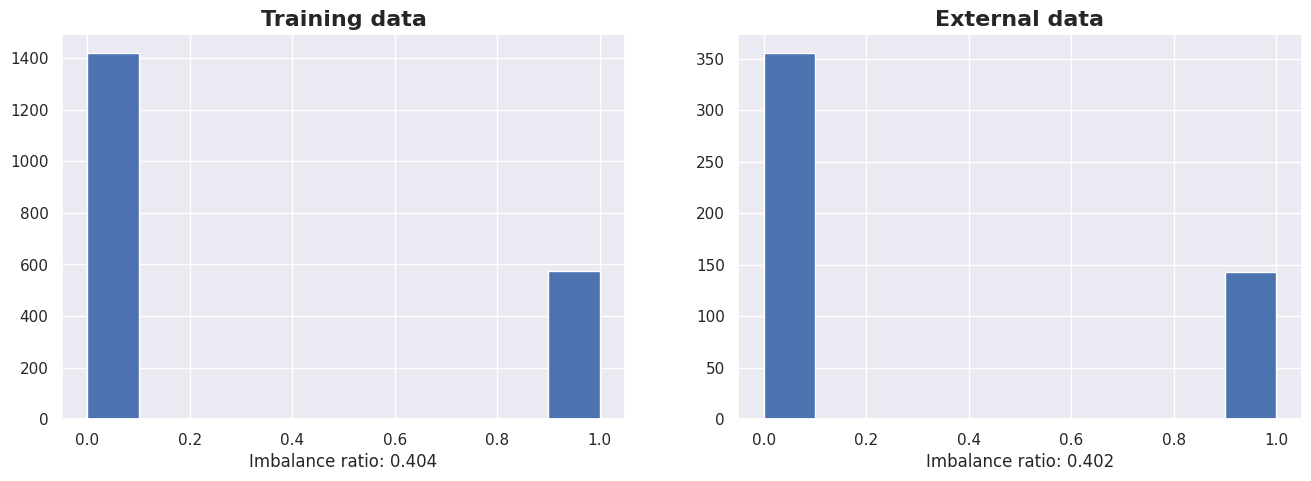

Total duplicated rows-train: 212
Data train before drop duplicates: 1995
Data train after drop duplicates: 1783
***************************************************************************
Total duplicated rows-test: 13
Data test before drop duplicates: 499
Data test after drop duplicates: 486
***************************************************************************
Index(['5', '15', '49', '50', '51', '52', '53', '54', '55', '100',
       ...
       '39962', '39963', '39964', '39965', '39966', '39967', '39968', '39969',
       '39970', '39971'],
      dtype='object', length=31624)
Total similar columns: 31624
Data train before drop duplicates: (1783, 39974)
Data after drop duplicates: (1783, 8350)
***************************************************************************
Data test before drop duplicates: (486, 39974)
Data test after drop duplicates: (486, 8350)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMis

,pChEMBL Value,0,1,2,3,4,6,7,8,9,...,37980,38648,38697,38738,38746,38794,38850,38946,38952,38958


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,6,7,8,9,...,37980,38648,38697,38738,38746,38794,38850,38946,38952,38958


Total row-test with missing value 0
(1783, 8348) (1783,)
>Threshold=0.00, Features=8347
>Threshold=0.05, Features=1592
>Threshold=0.10, Features=817
>Threshold=0.15, Features=519
>Threshold=0.20, Features=313


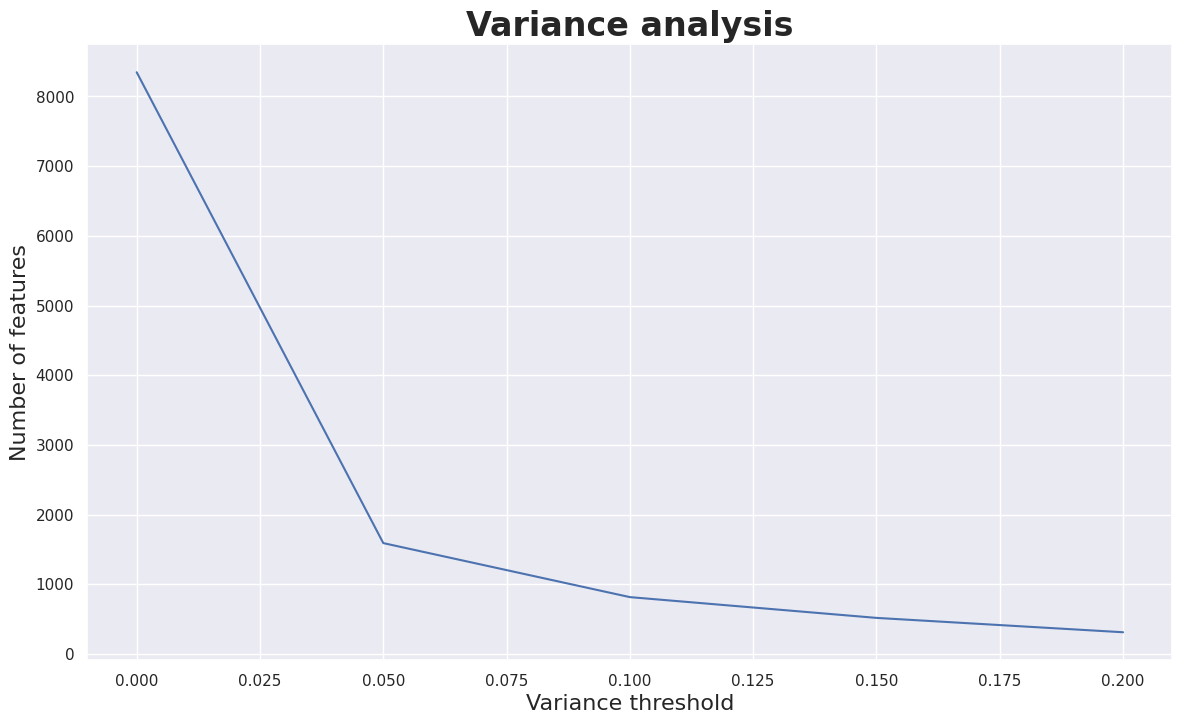

***************************************************************************


,pChEMBL Value,7,8,9,10,11,12,13,21,22,...,31016,31031,31032,31690,31691,31787,32021,33450,33677,33678
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,1,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 86
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.778 ± 0.046 (0.779)
>KNN 0.736 ± 0.041 (0.735)
>SVM 0.770 ± 0.033 (0.763)
>RF 0.769 ± 0.039 (0.764)
>ExT 0.772 ± 0.043 (0.776)
>Ada 0.749 ± 0.046 (0.739)
>Grad 0.782 ± 0.047 (0.776)
>XGB 0.773 ± 0.048 (0.766)
>CatB 0.775 ± 0.040 (0.771)
>MLP 0.771 ± 0.044 (0.766)
Data train: (1995, 883)
Data test: (499, 883)
***************************************************************************


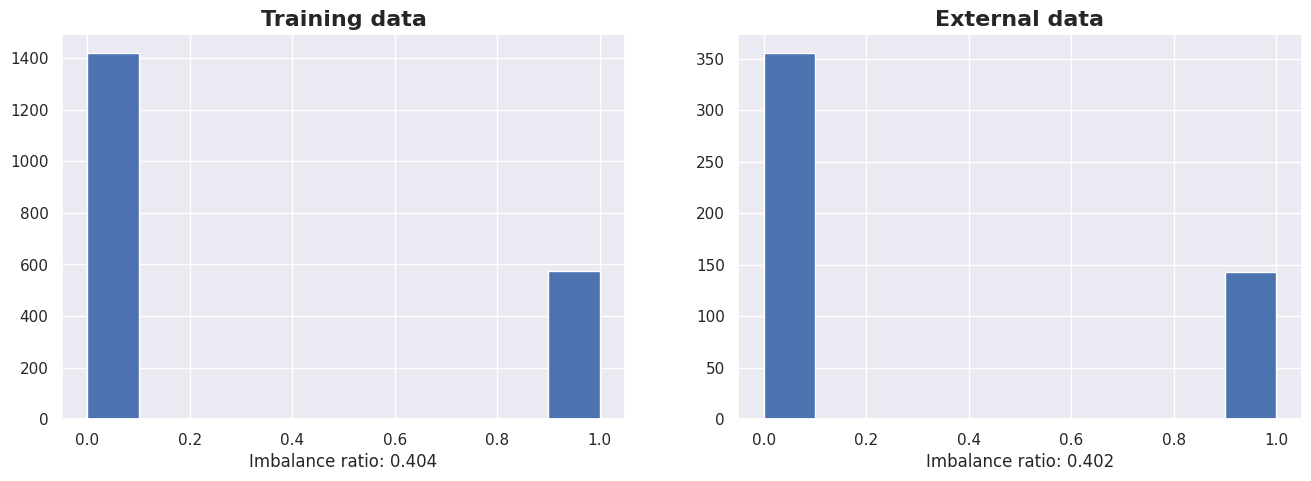

Total duplicated rows-train: 219
Data train before drop duplicates: 1995
Data train after drop duplicates: 1776
***************************************************************************
Total duplicated rows-test: 19
Data test before drop duplicates: 499
Data test after drop duplicates: 480
***************************************************************************
Index(['1', '2', '3', '4', '5', '7', '8', '13', '17', '22',
       ...
       '871', '872', '873', '874', '875', '876', '877', '878', '879', '880'],
      dtype='object', length=404)
Total similar columns: 404
Data train before drop duplicates: (1776, 883)
Data after drop duplicates: (1776, 479)
***************************************************************************
Data test before drop duplicates: (480, 883)
Data test after drop duplicates: (480, 479)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles            1776.0   

,pChEMBL Value,0,6,9,10,11,12,14,15,16,...,821,824,839,840,842,854,860,862,863,868


Total row-train with missing value 0


,pChEMBL Value,0,6,9,10,11,12,14,15,16,...,821,824,839,840,842,854,860,862,863,868


Total row-test with missing value 0
(1776, 477) (1776,)
>Threshold=0.00, Features=475
>Threshold=0.05, Features=290
>Threshold=0.10, Features=229
>Threshold=0.15, Features=178
>Threshold=0.20, Features=127


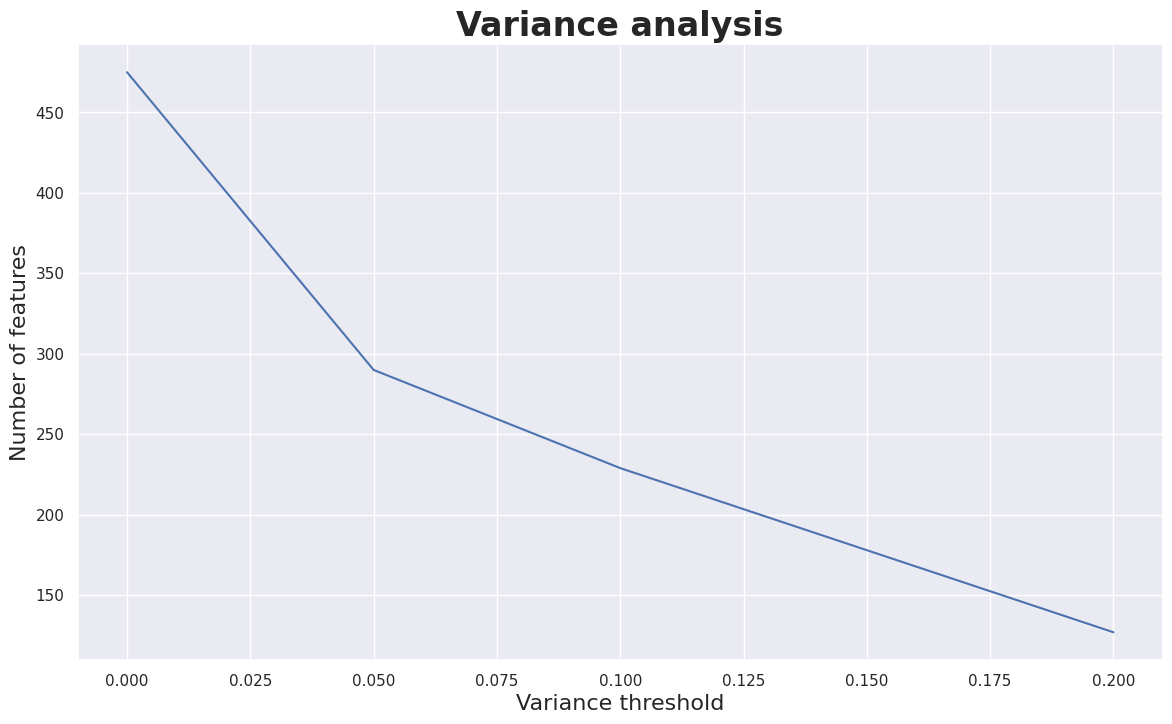

***************************************************************************


,pChEMBL Value,9,10,11,14,15,20,23,24,33,...,777,779,797,798,800,803,818,819,821,824
0,0,1,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
4,1,1,1,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 32
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.723 ± 0.065 (0.735)
>KNN 0.745 ± 0.054 (0.754)
>SVM 0.759 ± 0.058 (0.775)
>RF 0.760 ± 0.041 (0.763)
>ExT 0.764 ± 0.047 (0.768)
>Ada 0.710 ± 0.065 (0.720)
>Grad 0.766 ± 0.055 (0.768)
>XGB 0.770 ± 0.050 (0.779)
>CatB 0.784 ± 0.052 (0.794)
>MLP 0.758 ± 0.053 (0.769)
Data train: (1995, 2050)
Data test: (499, 2050)
***************************************************************************


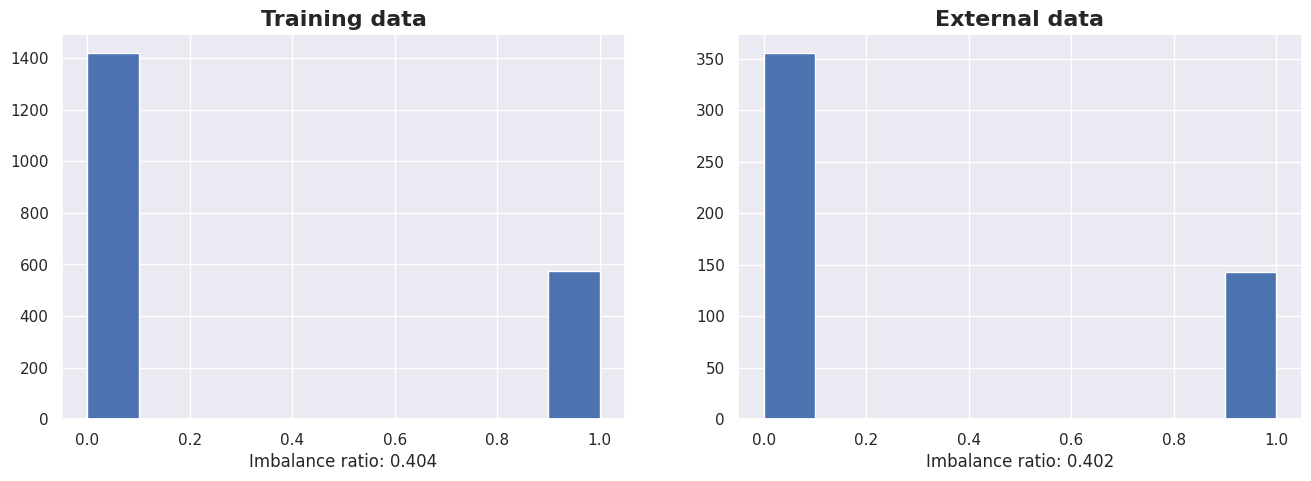

Total duplicated rows-train: 79
Data train before drop duplicates: 1995
Data train after drop duplicates: 1916
***************************************************************************
Total duplicated rows-test: 6
Data test before drop duplicates: 499
Data test after drop duplicates: 493
***************************************************************************
Index(['330', '842', '1026'], dtype='object')
Total similar columns: 3
Data train before drop duplicates: (1916, 2050)
Data after drop duplicates: (1916, 2047)
***************************************************************************
Data test before drop duplicates: (493, 2050)
Data test after drop duplicates: (493, 2047)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles            1916.0           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-test with missing value 0
(1916, 2045) (1916,)
>Threshold=0.00, Features=2044
>Threshold=0.05, Features=1442
>Threshold=0.10, Features=956
>Threshold=0.15, Features=663
>Threshold=0.20, Features=391


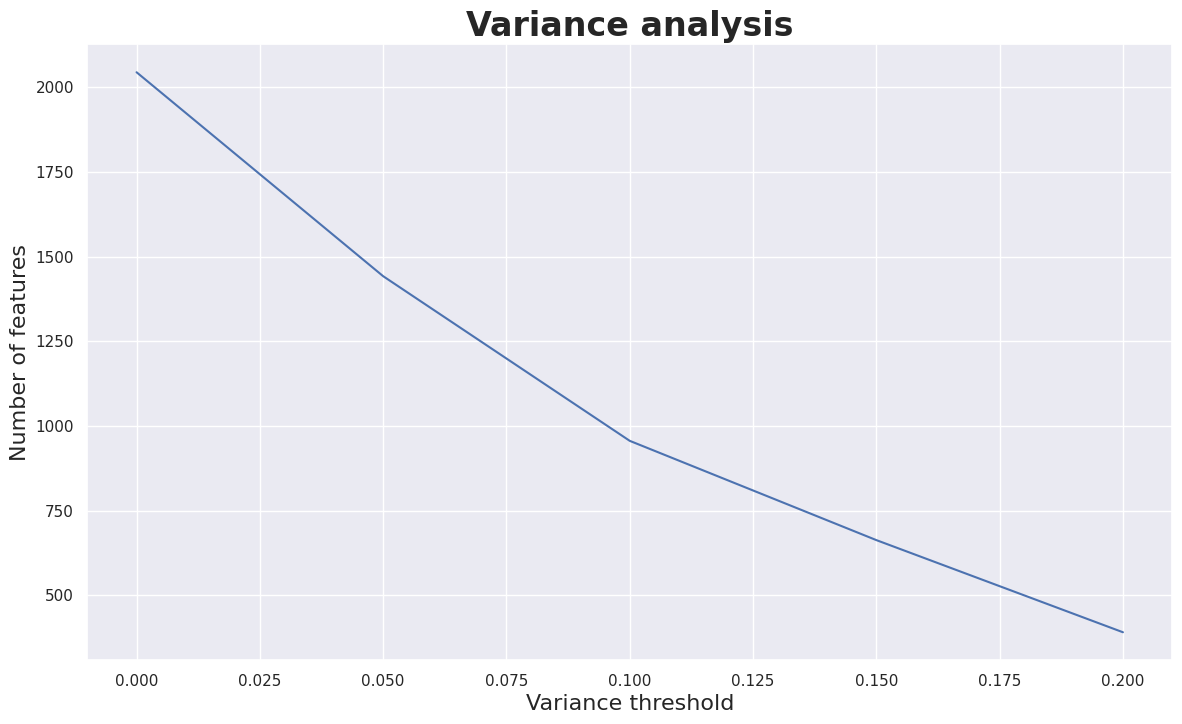

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,8,10,...,2032,2033,2037,2038,2040,2041,2042,2044,2045,2047
0,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 56
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.798 ± 0.029 (0.796)
>KNN 0.759 ± 0.052 (0.764)
>SVM 0.793 ± 0.046 (0.792)
>RF 0.800 ± 0.038 (0.800)
>ExT 0.794 ± 0.042 (0.804)
>Ada 0.754 ± 0.052 (0.763)
>Grad 0.793 ± 0.045 (0.798)
>XGB 0.799 ± 0.044 (0.805)
>CatB 0.804 ± 0.043 (0.808)
>MLP 0.797 ± 0.047 (0.796)
Data train: (1995, 2050)
Data test: (499, 2050)
***************************************************************************


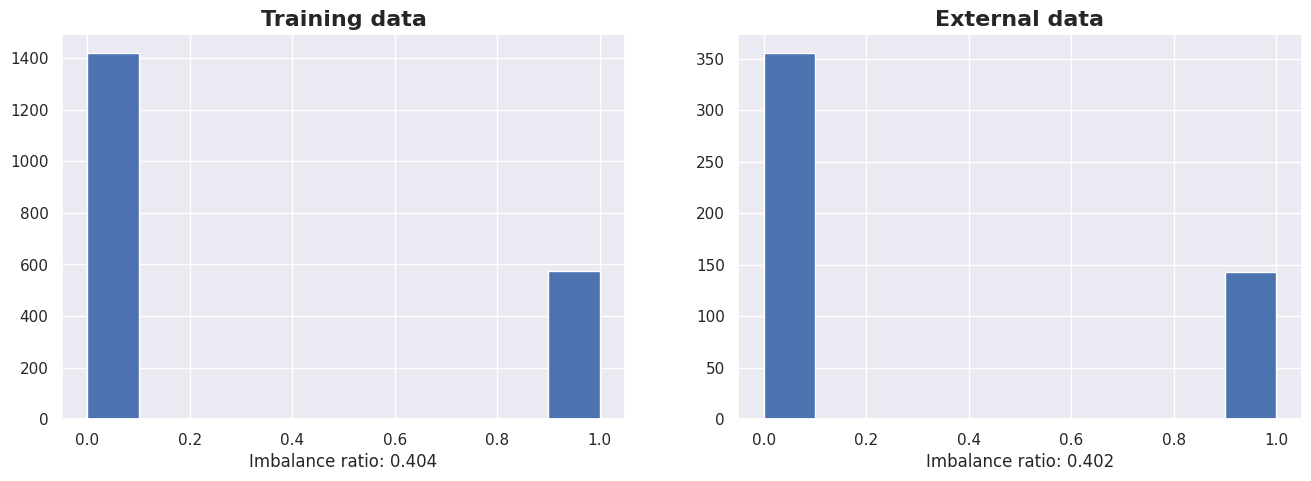

Total duplicated rows-train: 70
Data train before drop duplicates: 1995
Data train after drop duplicates: 1925
***************************************************************************
Total duplicated rows-test: 4
Data test before drop duplicates: 499
Data test after drop duplicates: 495
***************************************************************************
Index(['330', '1026'], dtype='object')
Total similar columns: 2
Data train before drop duplicates: (1925, 2050)
Data after drop duplicates: (1925, 2048)
***************************************************************************
Data test before drop duplicates: (495, 2050)
Data test after drop duplicates: (495, 2048)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles            1925.0           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-test with missing value 0
(1925, 2046) (1925,)
>Threshold=0.00, Features=2046
>Threshold=0.05, Features=2002
>Threshold=0.10, Features=1765
>Threshold=0.15, Features=1366
>Threshold=0.20, Features=871


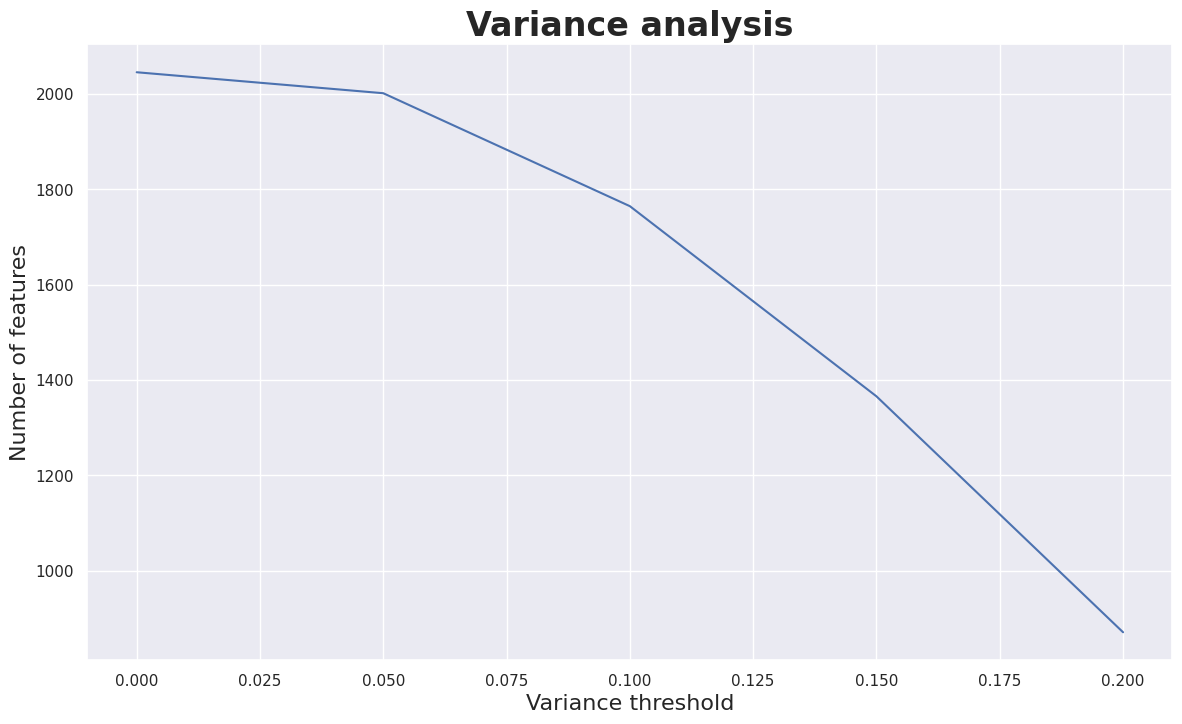

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,0,0,1,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,1,1
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,1,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 78
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.802 ± 0.036 (0.796)
>KNN 0.761 ± 0.038 (0.756)
>SVM 0.790 ± 0.039 (0.781)
>RF 0.801 ± 0.036 (0.790)
>ExT 0.801 ± 0.034 (0.805)
>Ada 0.749 ± 0.042 (0.745)
>Grad 0.804 ± 0.039 (0.800)
>XGB 0.805 ± 0.036 (0.811)
>CatB 0.806 ± 0.037 (0.796)
>MLP 0.807 ± 0.031 (0.802)
Data train: (1995, 4098)
Data test: (499, 4098)
***************************************************************************


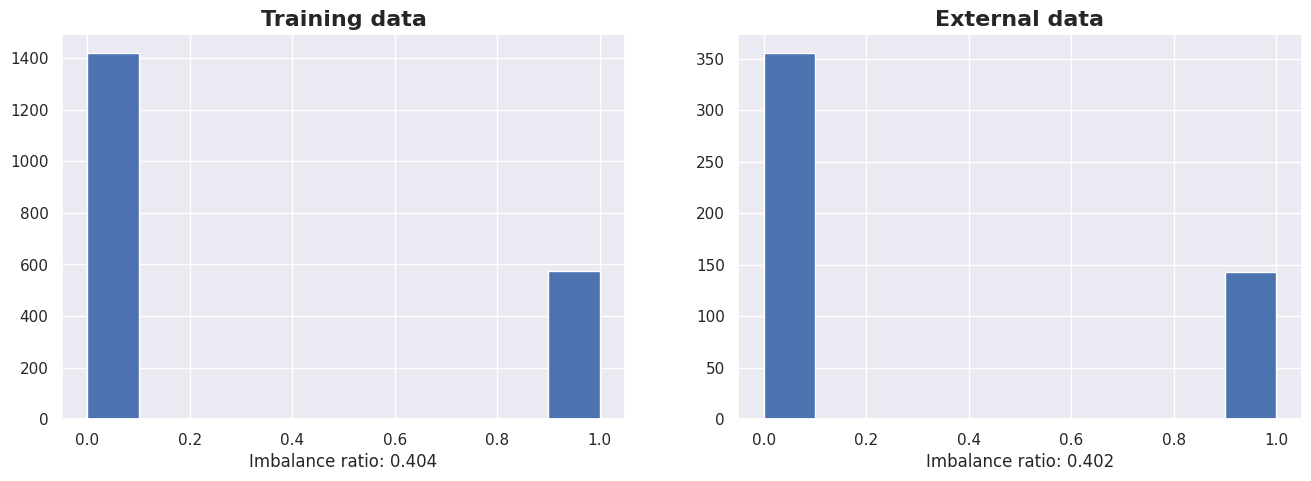

Total duplicated rows-train: 63
Data train before drop duplicates: 1995
Data train after drop duplicates: 1932
***************************************************************************
Total duplicated rows-test: 4
Data test before drop duplicates: 499
Data test after drop duplicates: 495
***************************************************************************
Index(['2342'], dtype='object')
Total similar columns: 1
Data train before drop duplicates: (1932, 4098)
Data after drop duplicates: (1932, 4097)
***************************************************************************
Data test before drop duplicates: (495, 4098)
Data test after drop duplicates: (495, 4097)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles            1932.0           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095


Total row-test with missing value 0
(1932, 4095) (1932,)
>Threshold=0.00, Features=4095
>Threshold=0.05, Features=4058
>Threshold=0.10, Features=3645
>Threshold=0.15, Features=2721
>Threshold=0.20, Features=1619


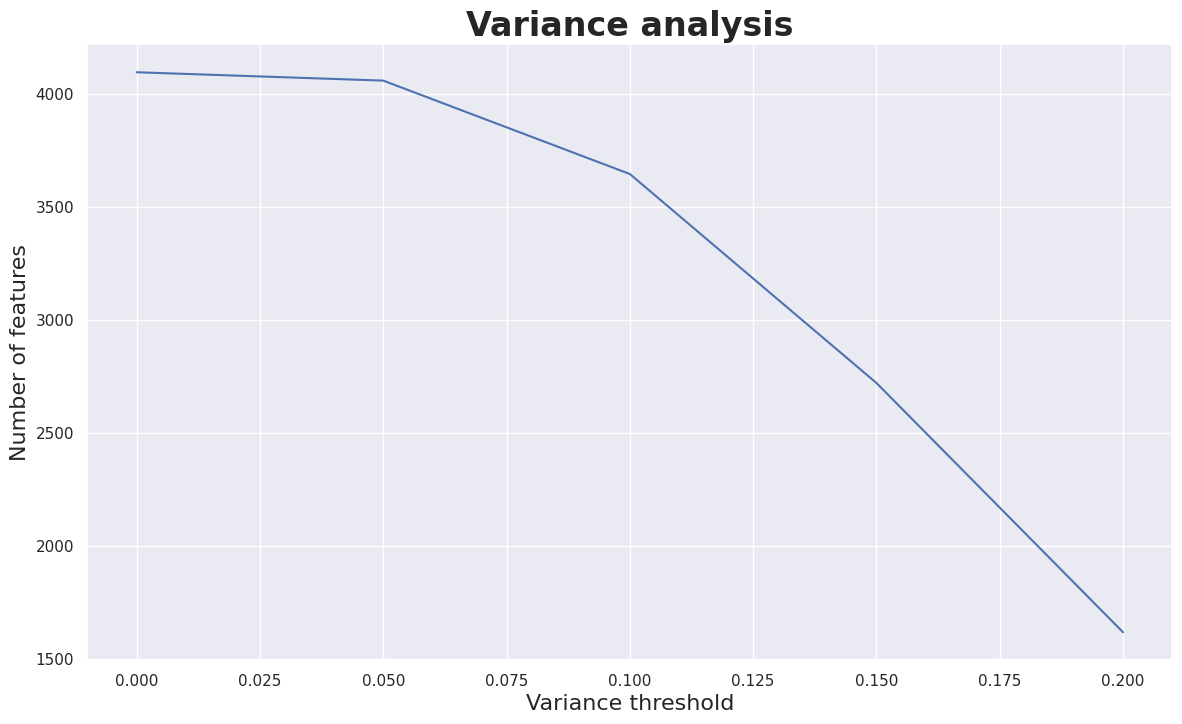

***************************************************************************


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,1


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 112
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.818 ± 0.033 (0.808)
>KNN 0.763 ± 0.042 (0.763)
>SVM 0.806 ± 0.041 (0.810)
>RF 0.821 ± 0.034 (0.823)
>ExT 0.817 ± 0.035 (0.818)
>Ada 0.782 ± 0.048 (0.789)
>Grad 0.823 ± 0.043 (0.825)
>XGB 0.828 ± 0.037 (0.832)
>CatB 0.830 ± 0.038 (0.833)
>MLP 0.828 ± 0.036 (0.829)
Data train: (1995, 210)
Data test: (499, 210)
***************************************************************************


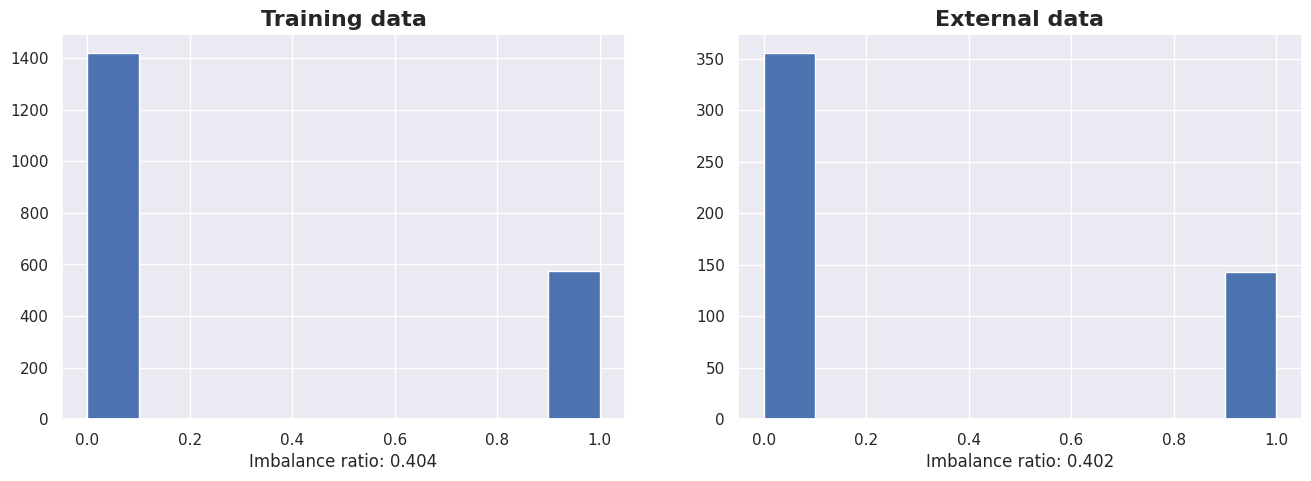

Total duplicated rows-train: 53
Data train before drop duplicates: 1995
Data train after drop duplicates: 1942
***************************************************************************
Total duplicated rows-test: 3
Data test before drop duplicates: 499
Data test after drop duplicates: 496
***************************************************************************
Index(['MaxAbsEStateIndex', 'SMR_VSA8', 'SlogP_VSA9', 'fr_COO2',
       'fr_Nhpyrrole', 'fr_alkyl_carbamate', 'fr_barbitur',
       'fr_benzodiazepine', 'fr_diazo', 'fr_dihydropyridine', 'fr_isocyan',
       'fr_isothiocyan', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester',
       'fr_prisulfonamd', 'fr_term_acetylene', 'fr_thiocyan'],
      dtype='object')
Total similar columns: 18
Data train before drop duplicates: (1942, 210)
Data after drop duplicates: (1942, 192)
***************************************************************************
Data test before drop duplicates: (496, 210)
Data test after drop duplicates: (496, 1

,pChEMBL Value,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea


Total row-train with missing value 0


,pChEMBL Value,MaxEStateIndex,MinEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_tetrazole,fr_thiazole,fr_thiophene,fr_unbrch_alkane,fr_urea


Total row-test with missing value 0
(1942, 190) (1942,)
>Threshold=0.00, Features=189
>Threshold=0.05, Features=139
>Threshold=0.10, Features=129
>Threshold=0.15, Features=125
>Threshold=0.20, Features=121
>Threshold=0.25, Features=116
>Threshold=0.30, Features=114
>Threshold=0.35, Features=113
>Threshold=0.40, Features=112
>Threshold=0.45, Features=110
>Threshold=0.50, Features=109
>Threshold=0.55, Features=107
>Threshold=0.60, Features=107
>Threshold=0.65, Features=104
>Threshold=0.70, Features=102
>Threshold=0.75, Features=102
>Threshold=0.80, Features=98
>Threshold=0.85, Features=97
>Threshold=0.90, Features=95
>Threshold=0.95, Features=95


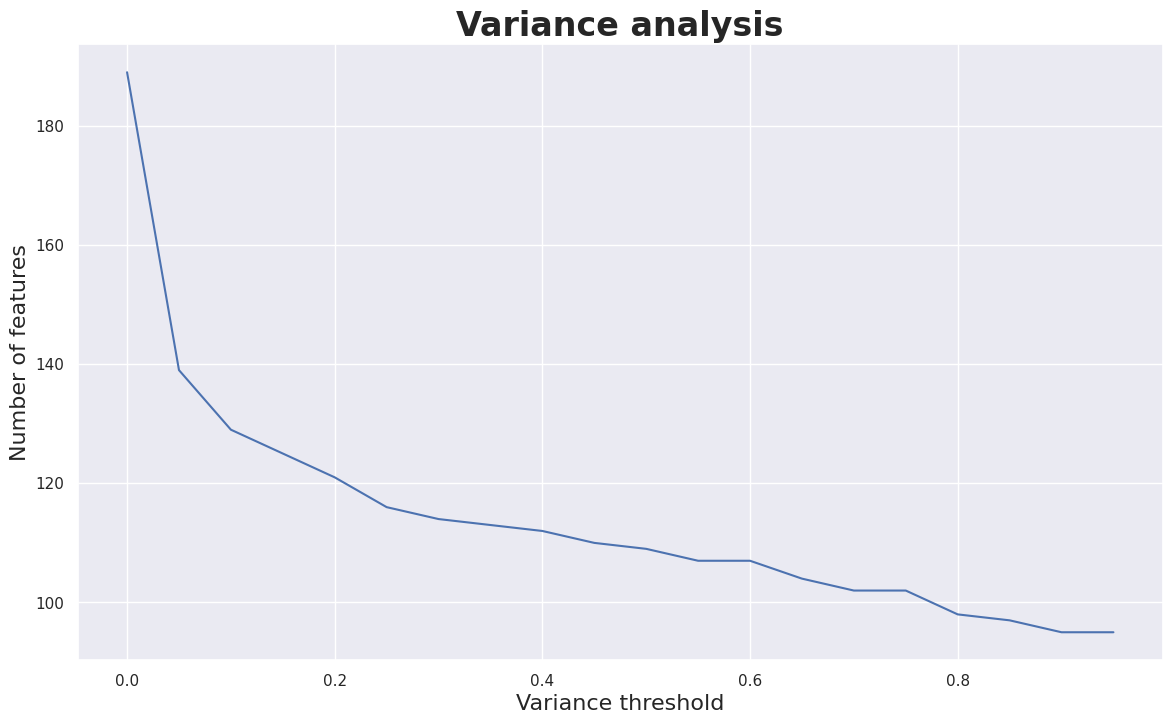

***************************************************************************


,pChEMBL Value,MaxEStateIndex,MinEStateIndex,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,...,fr_ketone_Topliss,fr_methoxy,fr_nitro,fr_nitro_arom,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_pyridine,fr_sulfonamd,fr_unbrch_alkane
0,0,11.594218,-0.394147,288.328,276.232,288.056863,102.0,2.050000,2.750000,32.092047,...,0,0,0,0,2,1,1,0,0,0.0
1,0,11.816338,-0.845126,308.746,299.674,308.002241,102.0,1.900000,2.500000,35.495692,...,2,0,0,0,0,0,0,0,0,0.0
2,0,11.820732,-1.496006,360.318,344.190,360.084517,136.0,1.538462,2.115385,16.559316,...,0,0,0,0,0,4,4,0,0,0.0
3,0,12.381821,-0.407926,270.240,260.160,270.052823,100.0,1.600000,2.300000,16.332088,...,0,0,0,0,0,3,3,0,0,0.0
4,1,12.994323,-0.754736,403.414,381.238,403.165582,154.0,1.896552,2.551724,19.142146,...,0,0,0,0,0,0,0,0,0,0.0


Remove by IQR without handling
Total data remove on Train 1733
Total data remove on Test 443
Number of good features: 2
Number of bad features with data remove > 0: 91
***************************************************************************
Uniform Transformer technique
Total data remove on Train 1114
Total data remove on Test 297
Number of good features: 87
Number of bad features with data remove > 0: 6
***************************************************************************
Handling with KBin method
////// ['PEOE_VSA4', 'PEOE_VSA5', 'SMR_VSA2', 'SMR_VSA4', 'SlogP_VSA7', 'fr_unbrch_alkane'] 6
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 87
Number of bad features with data remove > 0: 0
***************************************************************************
***************************************************************************
Total outlier remove by LOF: 78
***************************************************************************
S

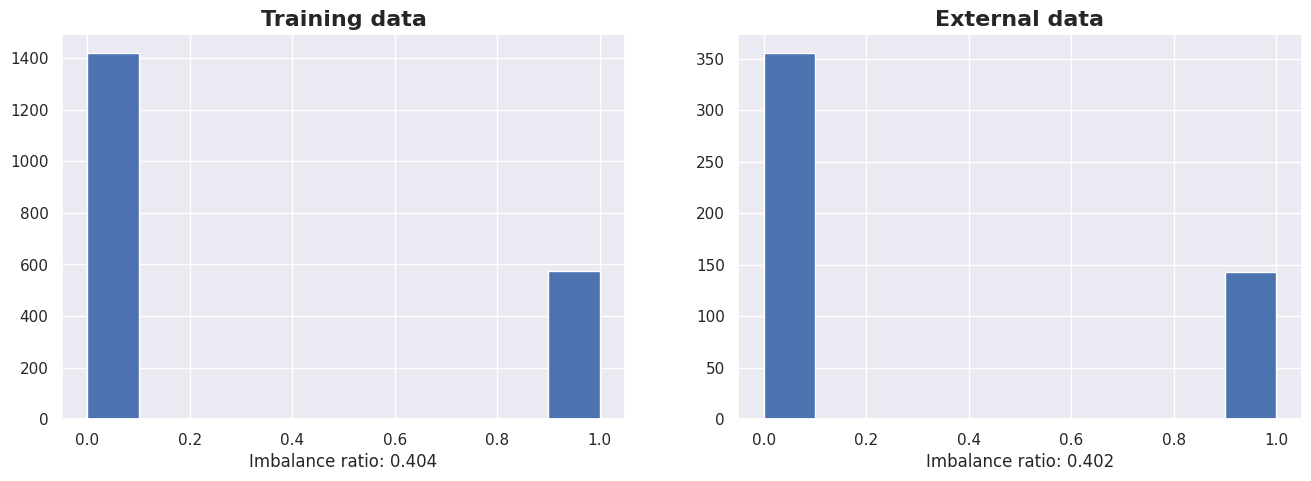

Total duplicated rows-train: 3
Data train before drop duplicates: 1995
Data train after drop duplicates: 1992
***************************************************************************
Total duplicated rows-test: 0
Data test before drop duplicates: 499
Data test after drop duplicates: 499
***************************************************************************
Index(['232', '1668'], dtype='object')
Total similar columns: 2
Data train before drop duplicates: (1992, 2050)
Data after drop duplicates: (1992, 2048)
***************************************************************************
Data test before drop duplicates: (499, 2050)
Data test after drop duplicates: (499, 2048)
***************************************************************************
        ColumnName  TotalMissingVals  PercentMissing
0  Canomicalsmiles            1992.0           100.0
Drop_cols ['Canomicalsmiles']
Total missing value-train 0
Total missing value-test 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-train with missing value 0


,pChEMBL Value,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047


Total row-test with missing value 0
(1992, 2046) (1992,)
>Threshold=0.00, Features=2045
>Threshold=0.05, Features=244
>Threshold=0.10, Features=100
>Threshold=0.15, Features=49
>Threshold=0.20, Features=26


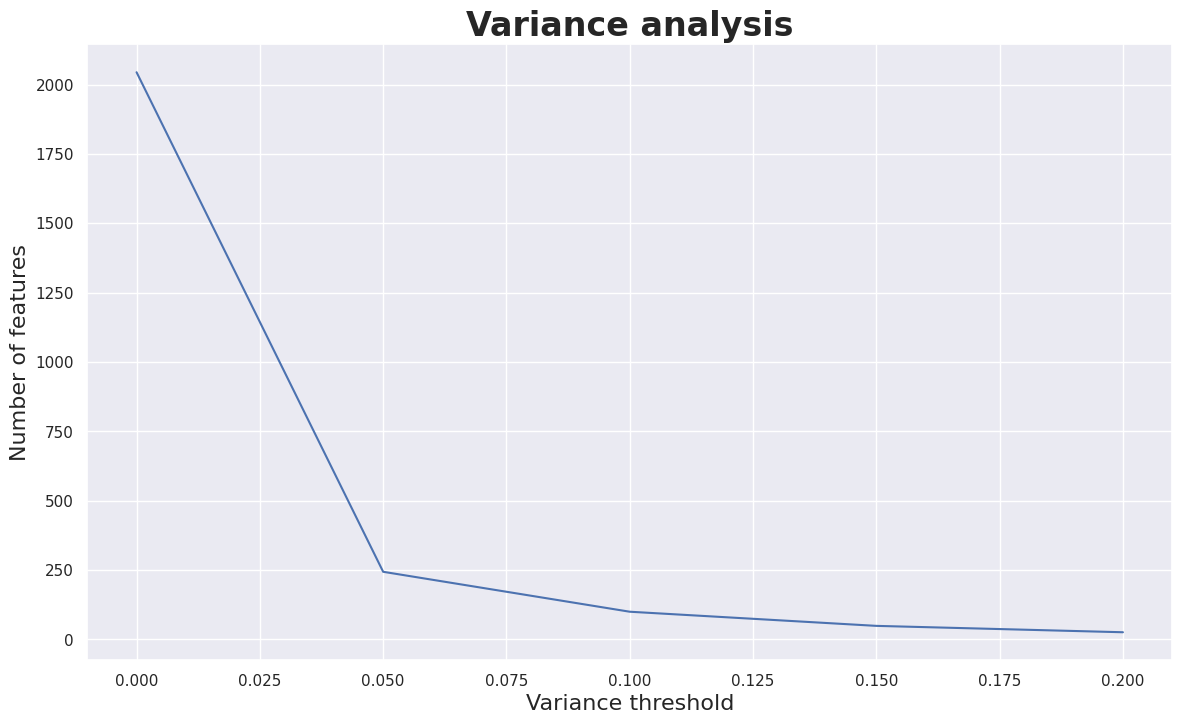

***************************************************************************


,pChEMBL Value,23,38,40,50,51,56,66,69,74,...,1997,2003,2005,2016,2022,2025,2026,2029,2033,2046
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,1
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Remove by IQR without handling
Total data remove on Train 0
Total data remove on Test 0
Number of good features: 0
Number of bad features with data remove > 0: 0
***************************************************************************
Uniform Transformer technique
Total outlier remove by LOF: 1
***************************************************************************
Scaling method: MinMaxScaler
>Logistic 0.756 ± 0.042 (0.758)
>KNN 0.755 ± 0.039 (0.758)
>SVM 0.786 ± 0.043 (0.785)
>RF 0.800 ± 0.040 (0.803)
>ExT 0.801 ± 0.044 (0.802)
>Ada 0.729 ± 0.044 (0.738)
>Grad 0.786 ± 0.036 (0.786)
>XGB 0.809 ± 0.041 (0.809)
>CatB 0.810 ± 0.044 (0.809)
>MLP 0.809 ± 0.043 (0.809)
META DATA SAVING...
Avalon     0.797
Cats2d     0.691
ECFP2      0.766
ECFP4      0.773
ECFP6      0.780
MACCs      0.746
Map4       0.773
Mol2vec    0.770
Mordred    0.775
Ph4        0.767
Pubchem    0.754
RDK5       0.789
RDK6       0.793
RDK7       0.811
RDKdes     0.771
Secfp      0.784
dtype: float64
META DATA SAV

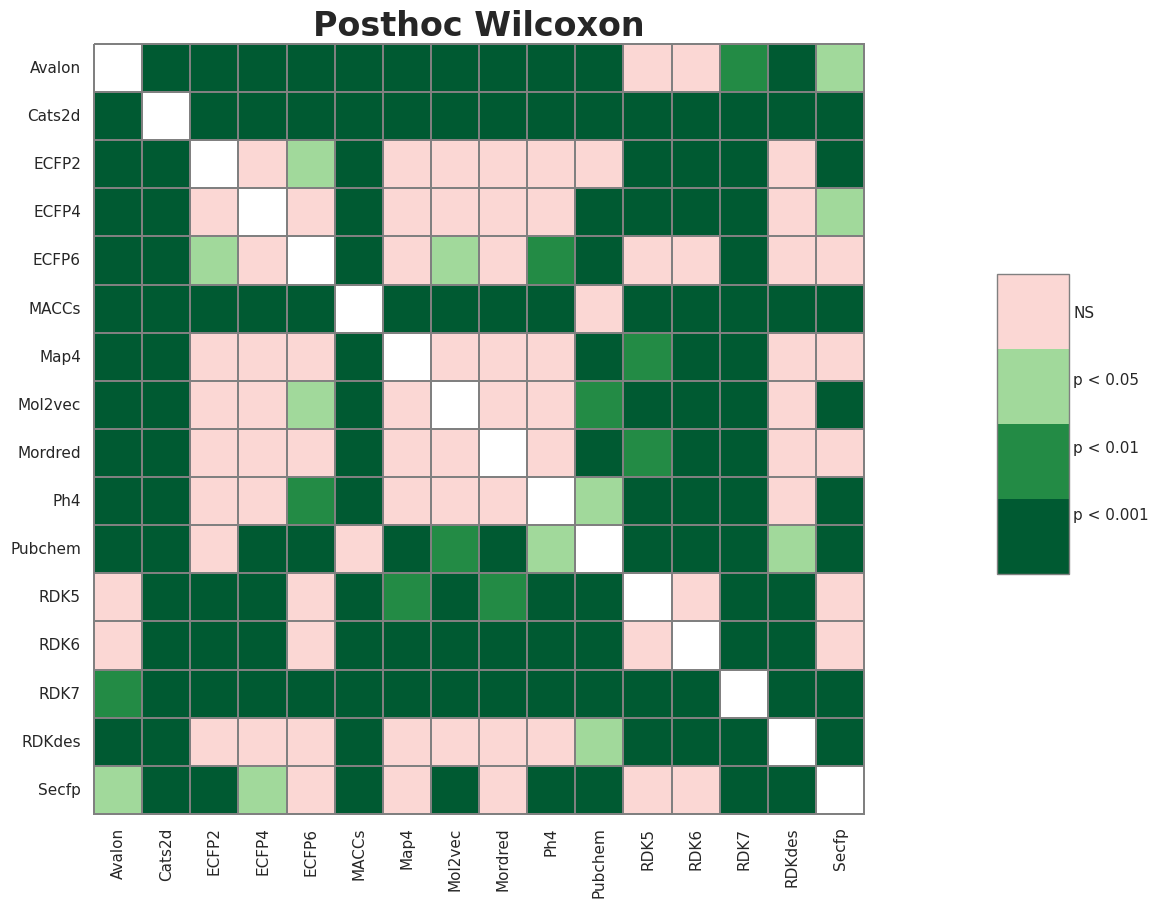

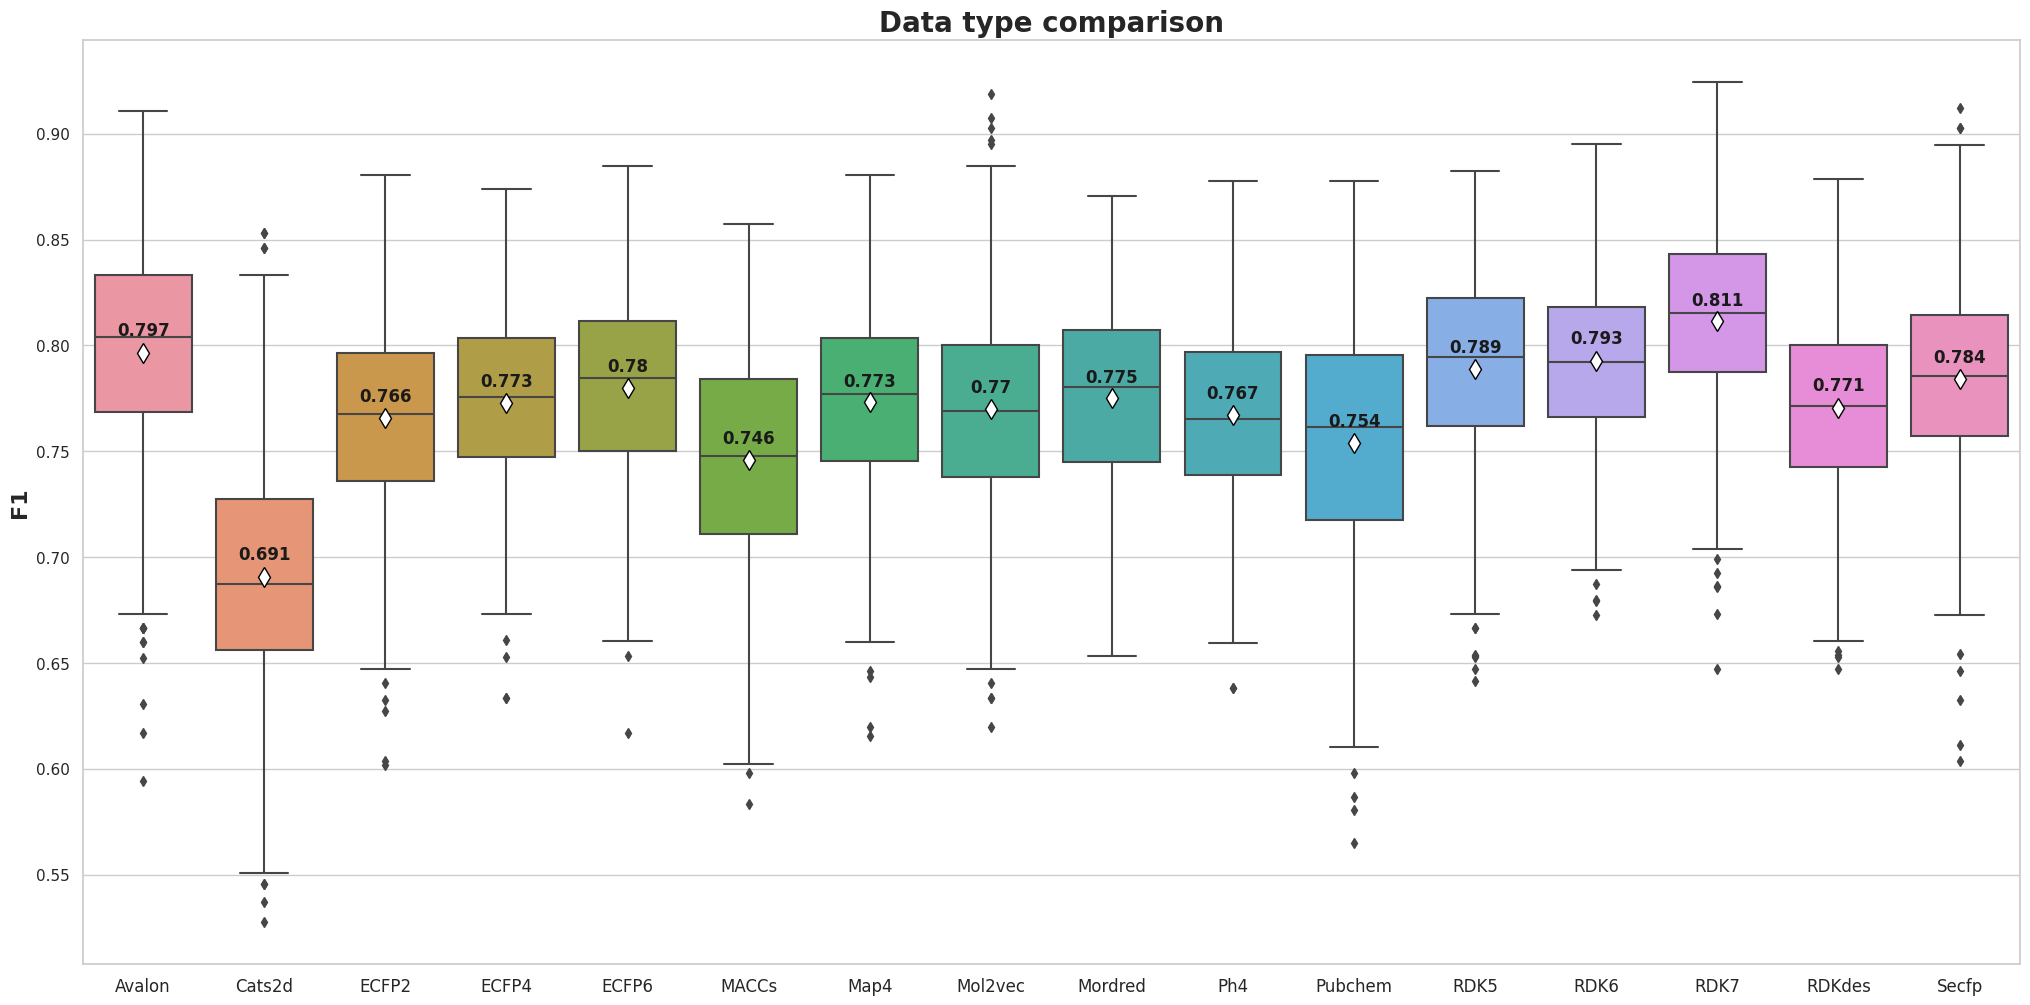

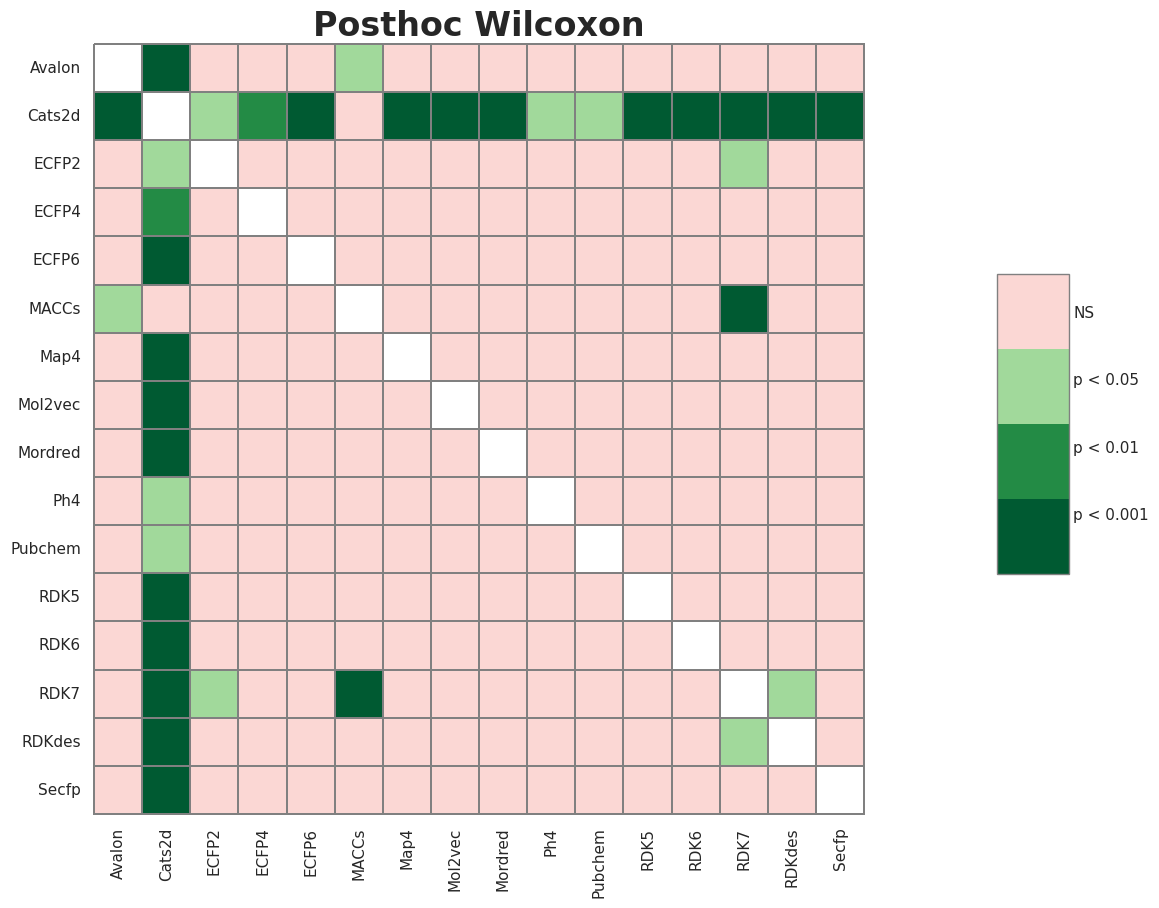

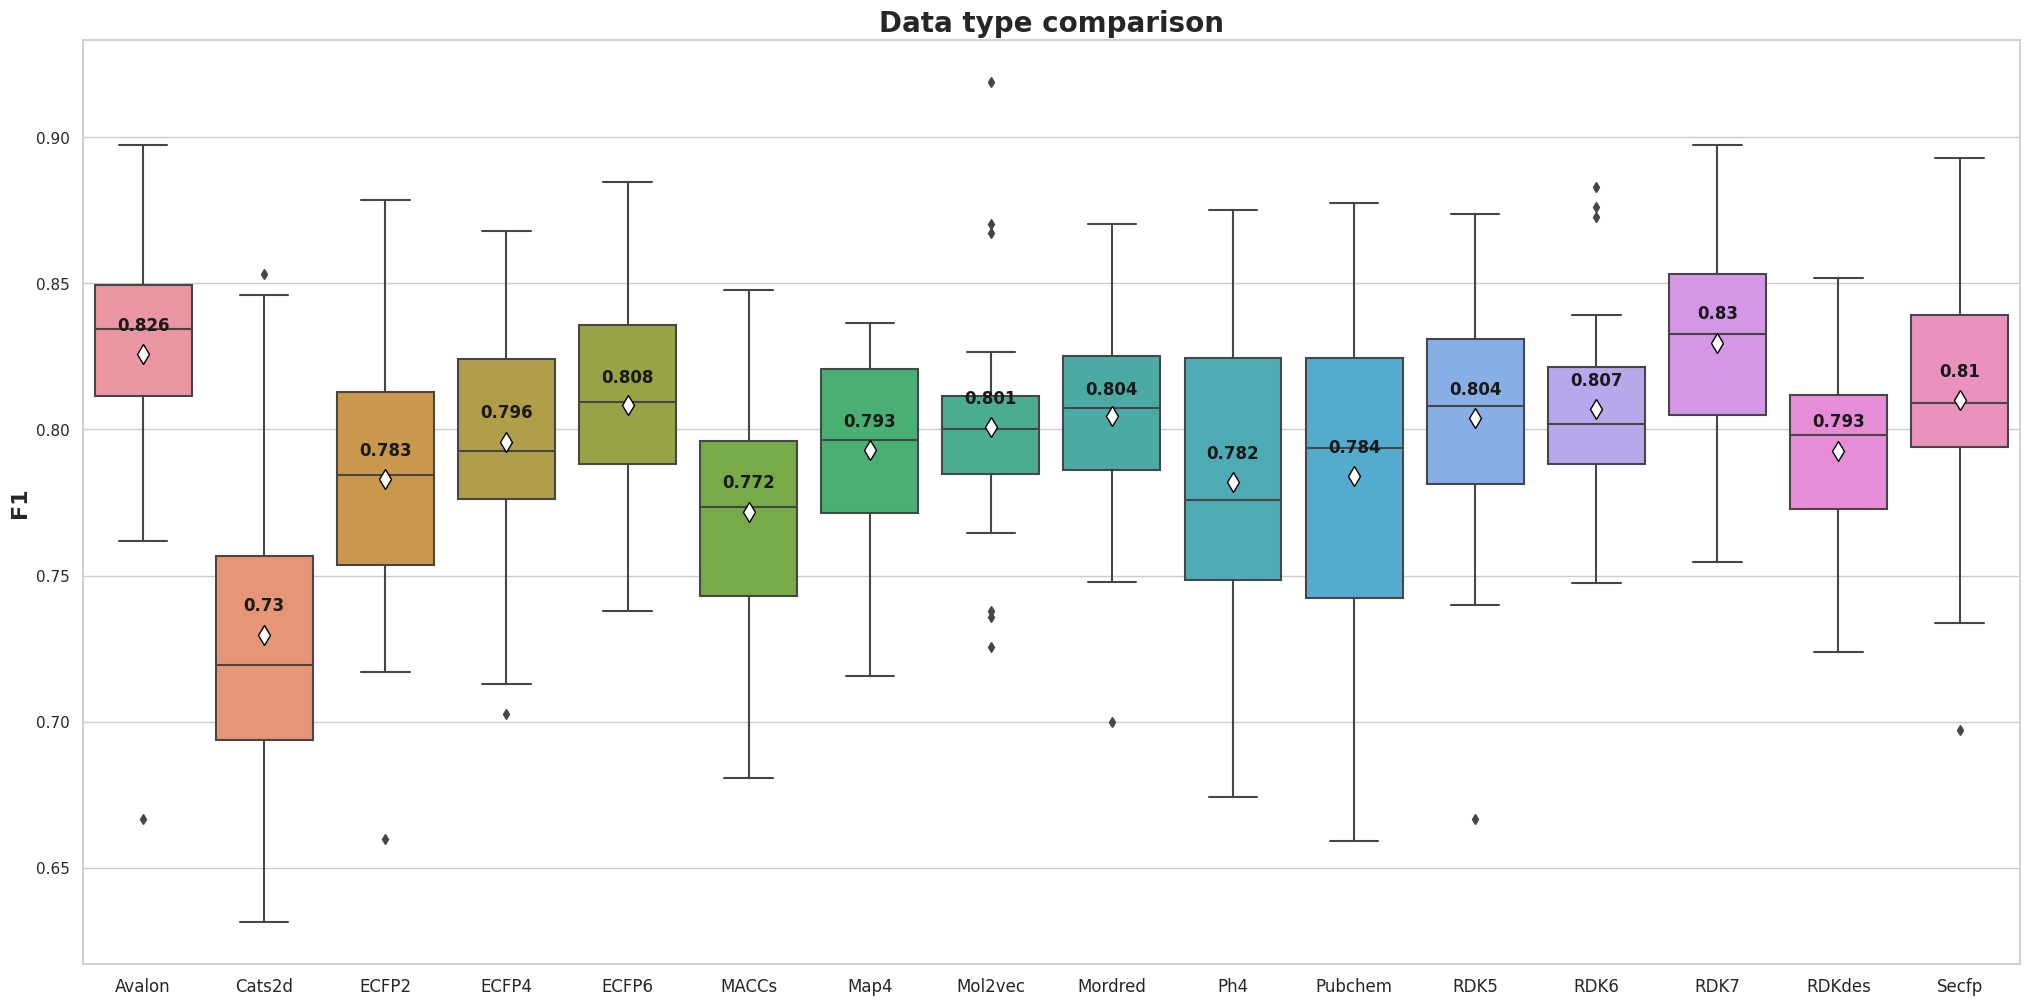

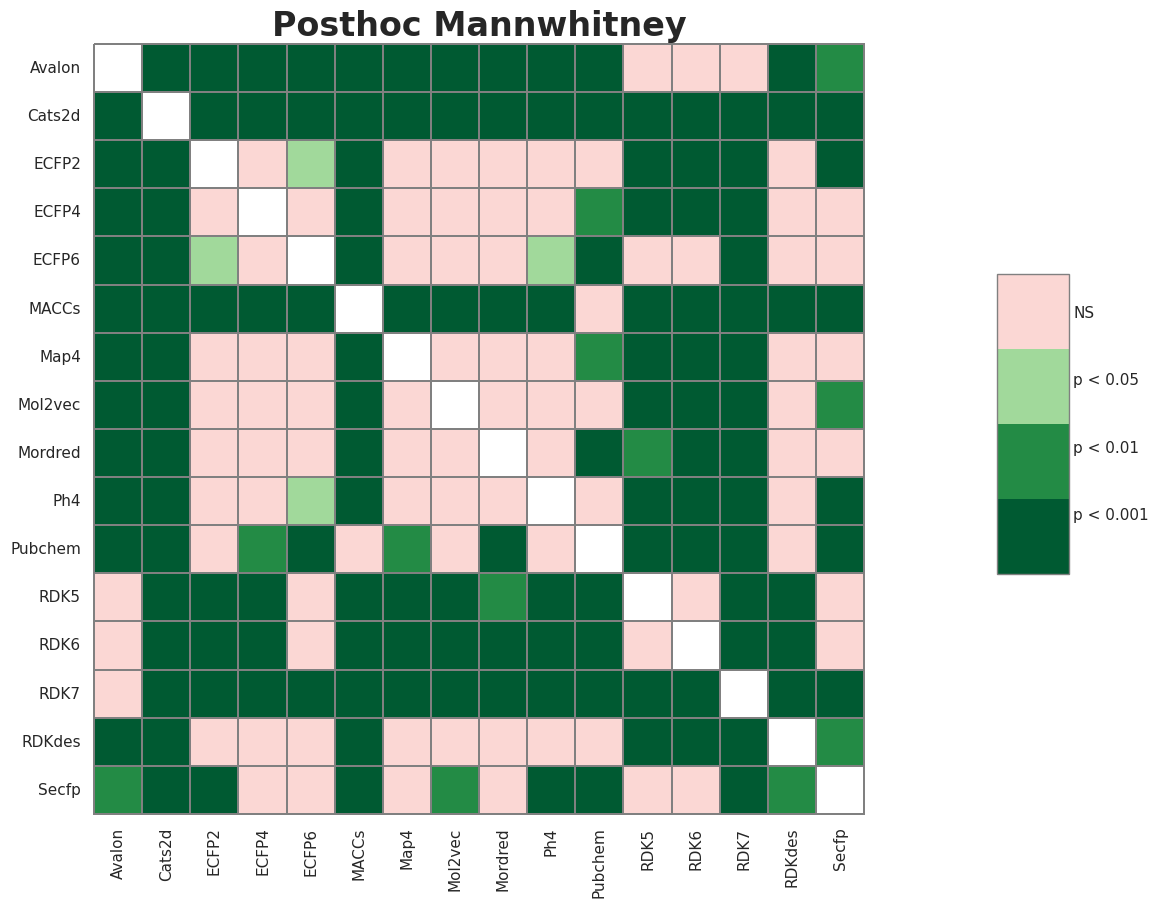

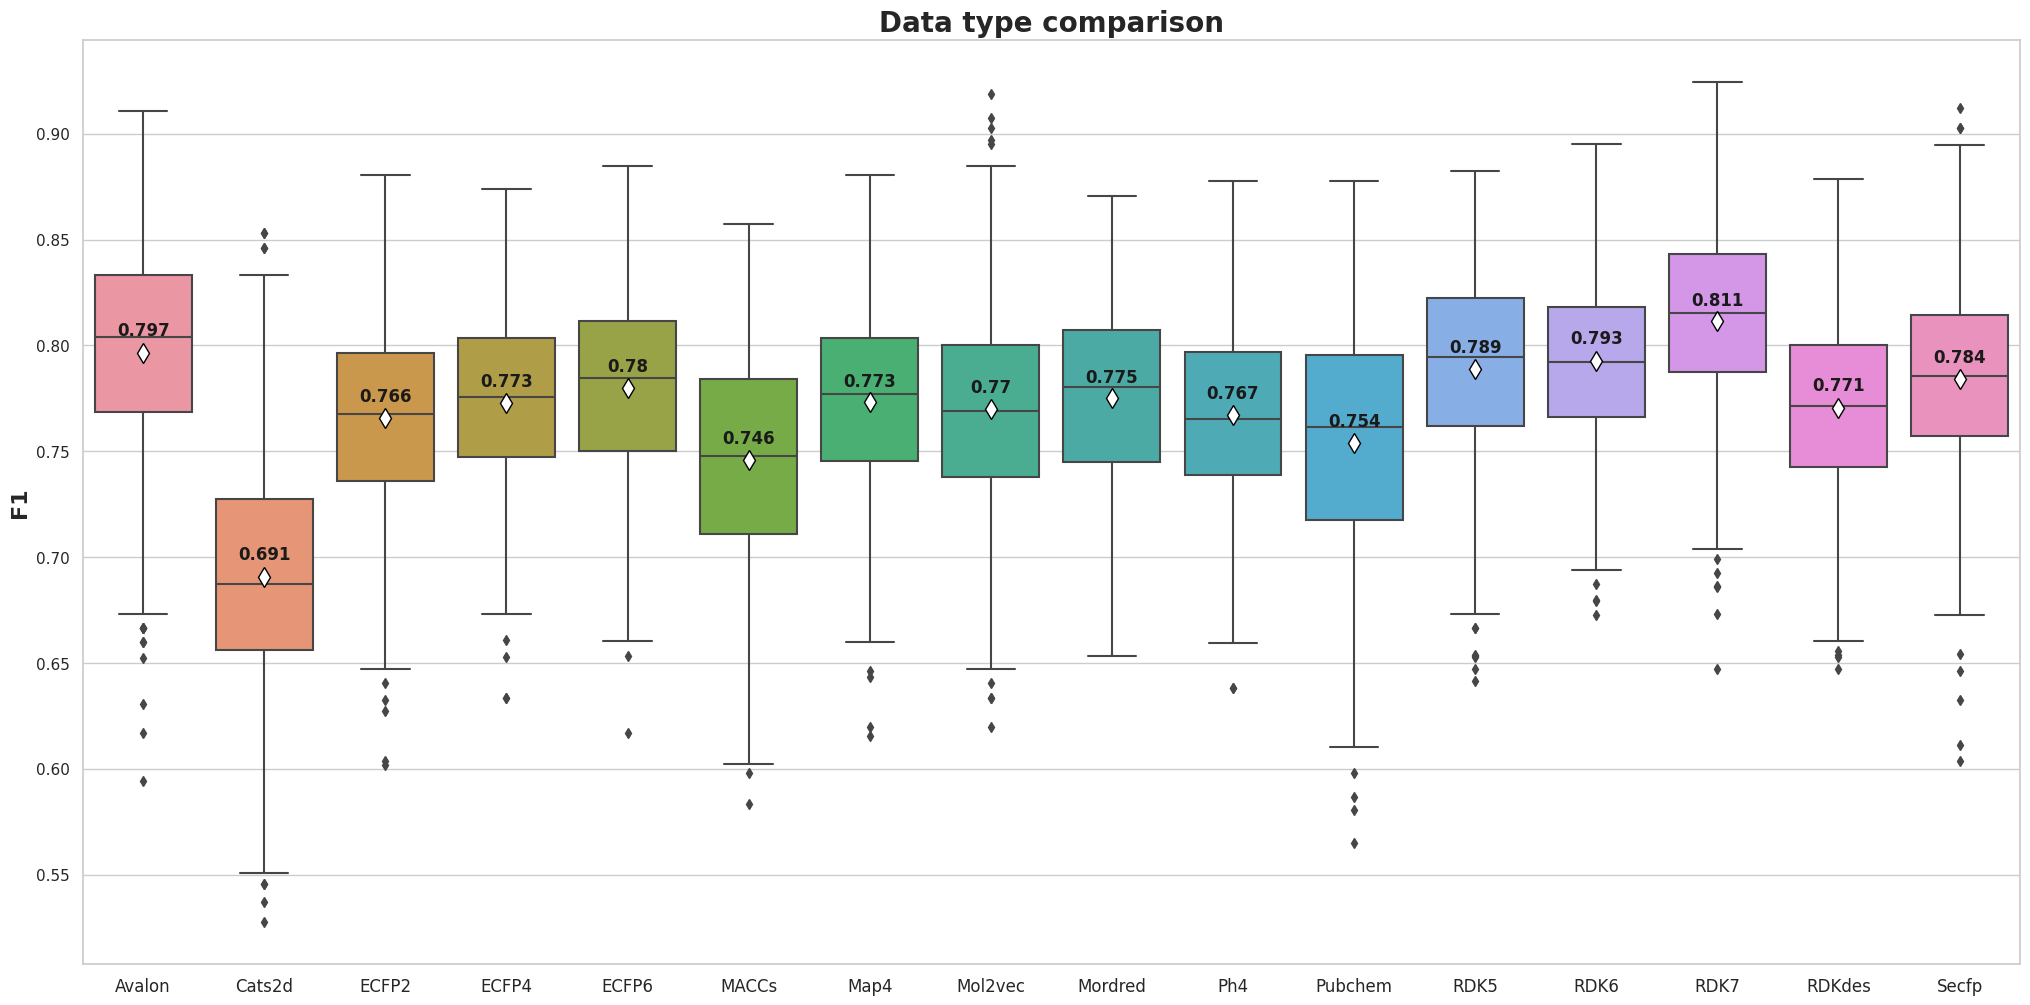

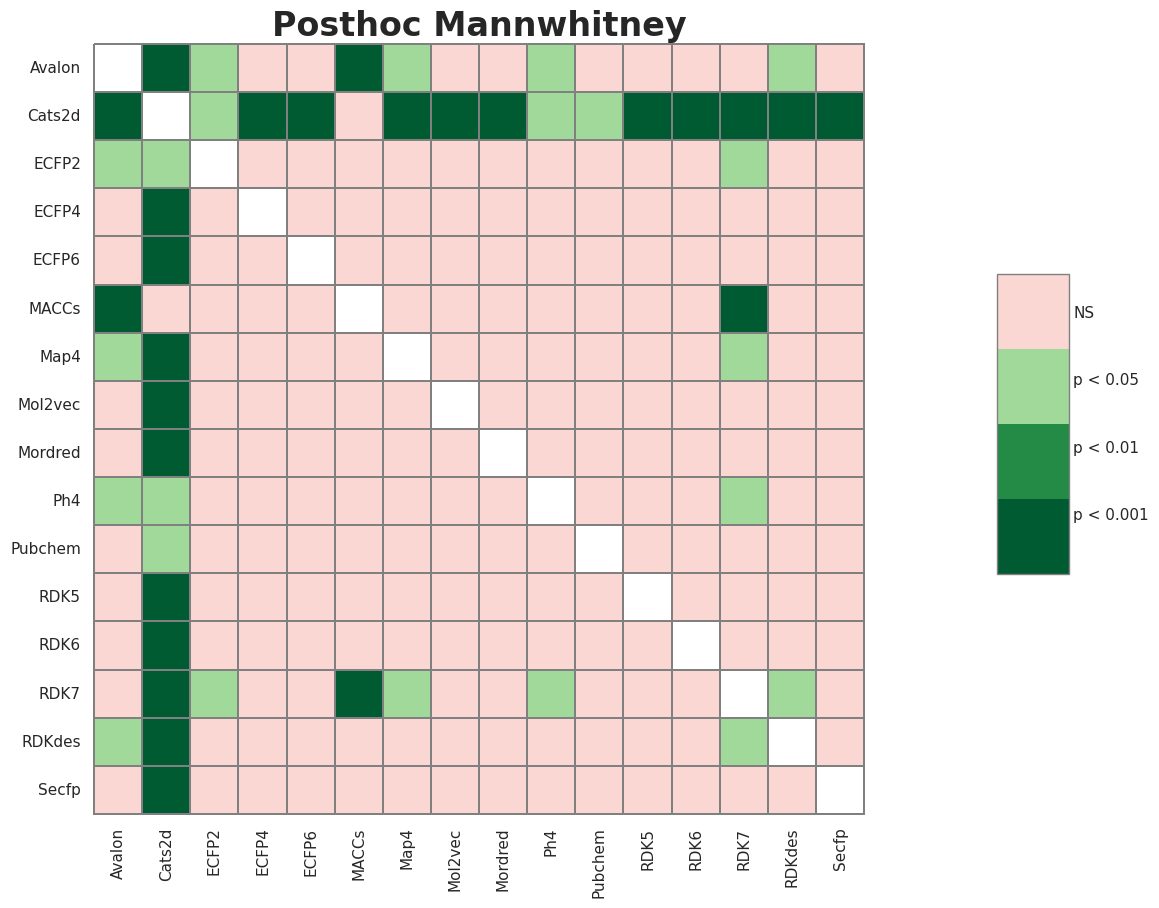

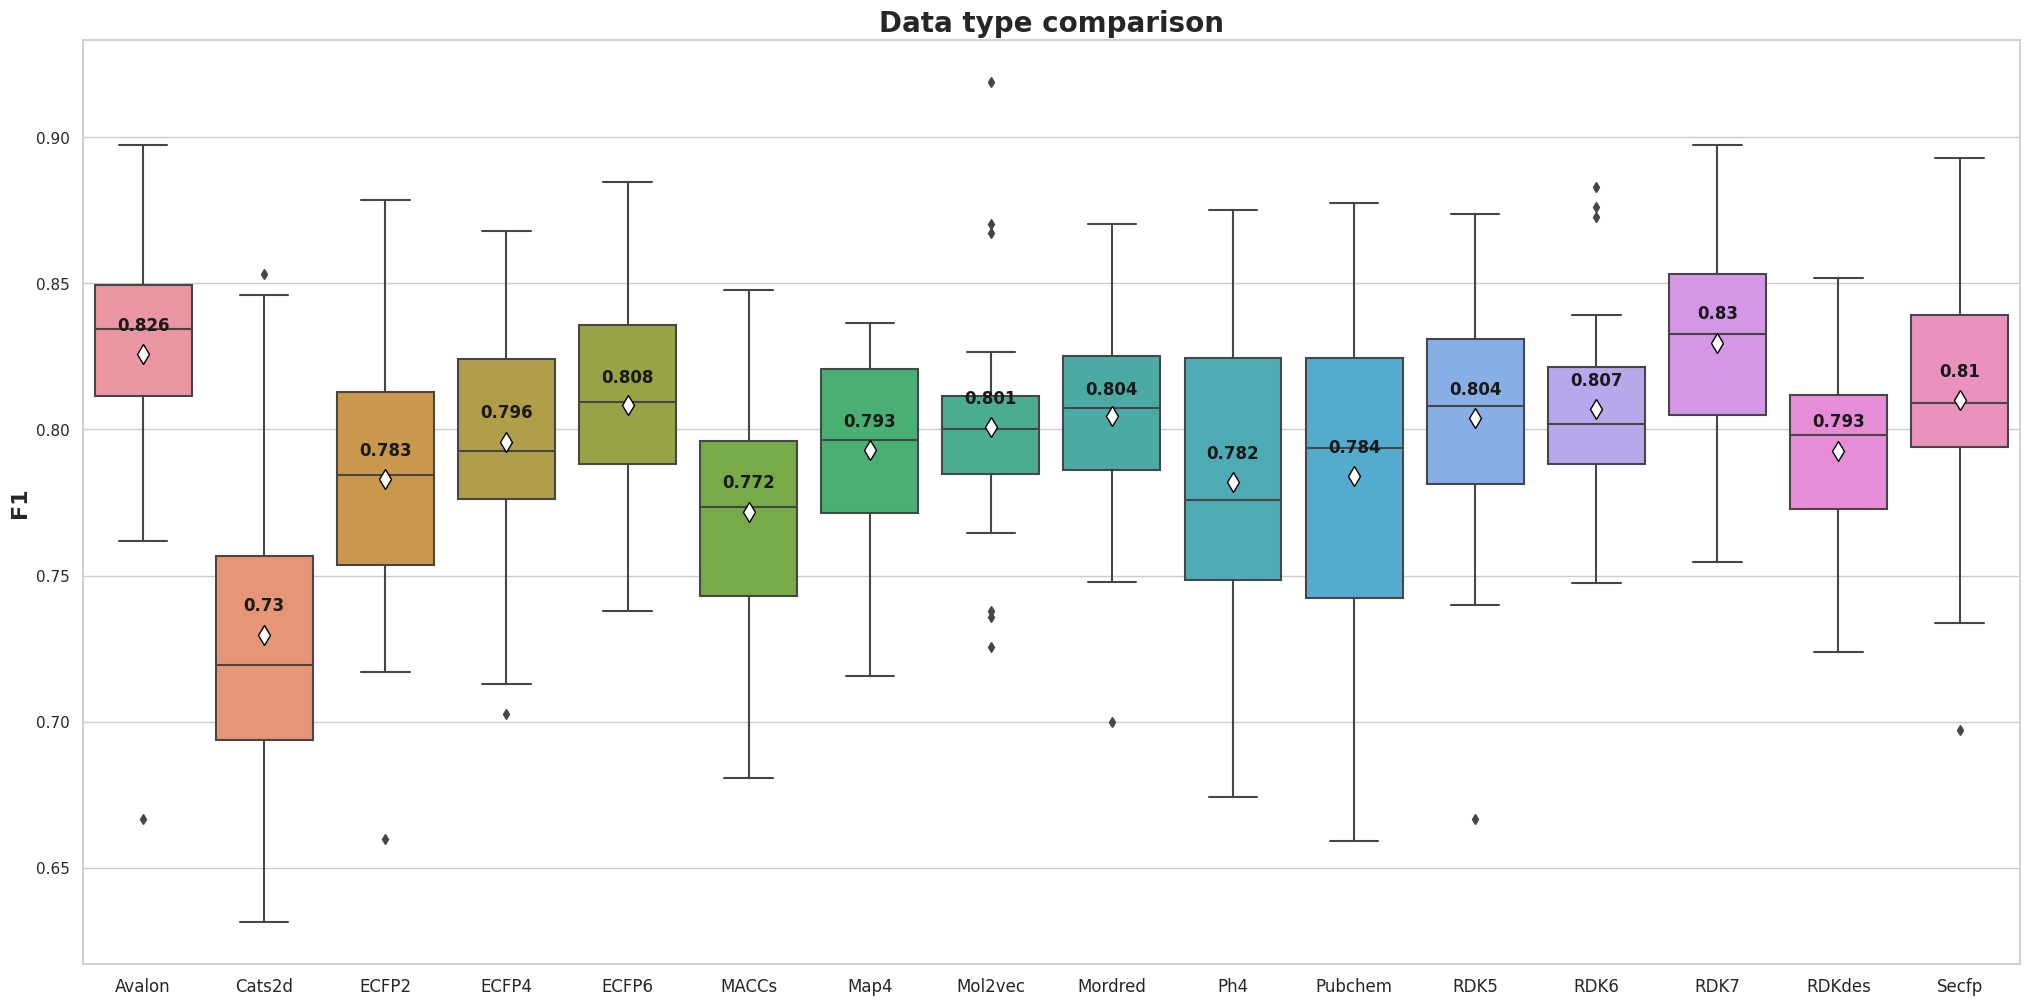

In [2]:
data_path = os.getcwd() + '/raw_data_features'
pip  = QSAR_pipeline(data_path=data_path,  task_type ='C', scoring ='f1',kind_analysis =['Meta','Subgroup'],
                     activity_col='pChEMBL Value', save_data = True, target_thresh=7, posthoc_method =['Wilcoxon', 'Mannwhitney'])
pip.fit()

# 3. Optimization